# Surprise Housing Advanced Regression Assignment

In [710]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

import math
import datetime

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [711]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500

In [712]:
df = pd.read_csv("train.csv") # Importing the CSV file

In [713]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [714]:
df.shape

(1460, 81)

In [715]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Preparing Data

### Checking Null Values and treating the variables 

In [717]:
null_columns=df.columns[df.isnull().any()] # This will create a list of all the variables with some null values in the dataframe
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [718]:
df.LotFrontage.value_counts(dropna= False)  

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64

In [719]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True) #Replacing Nan with median

In [720]:
df.Alley.value_counts(dropna= False) 

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [721]:
df['Alley'] = df['Alley'].fillna("No_Alley")    #NaN means there is no alley and can be imputed as "No_Alley"

In [722]:
df.MasVnrType.value_counts(dropna= False) 

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [723]:
df['MasVnrType'] = df['MasVnrType'].fillna("No_Vnr")    # NaN can be imputed as "No_Vnr"

In [724]:
df.MasVnrArea.value_counts(dropna= False) 

0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64

In [725]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)    # NaN means no Vnr Area which can be imputed as 0.0

In [726]:
df.BsmtQual.value_counts(dropna= False)  

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [727]:
df['BsmtQual'] = df['BsmtQual'].fillna("No_Basement_Qual")    #NaN means no Basement and can be imputed as "No_Basement_Qual"

In [728]:
df.BsmtCond.value_counts(dropna= False)   

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [729]:
df['BsmtCond'] = df['BsmtCond'].fillna("No_Basement_Cond")    #NaN means no Basement and can be imputed as "No_Basement_Cond"

In [730]:
df.BsmtExposure.value_counts(dropna= False)   

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [731]:
df['BsmtExposure'] = df['BsmtExposure'].fillna("No_Basement_Expo")    #NaN means no Basement and can be imputed as "No_Basement_Expo"

In [732]:
df.BsmtFinType1.value_counts(dropna= False)   

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [733]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("No_Basement_Fin1")    #NaN means no Basement and can be imputed as "No_Basement_Fin1"

In [734]:
df.BsmtFinType2.value_counts(dropna= False)   

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [735]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("No_Basement_Fin2")    #NaN means no Basement and can be imputed as "No_Basement_Fin2"

In [736]:
df.FireplaceQu.value_counts(dropna= False)   

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [737]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("No_Fireplace")  #NaN means no Fireplace and can be imputed as "No_Fireplace"

In [738]:
df.GarageType.value_counts(dropna= False)  

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [739]:
df['GarageType'] = df['GarageType'].fillna("No_Garage_typ")    #NaN means no Garage and can be imputed as "No_Garage_typ"

In [740]:
df.GarageYrBlt.value_counts(dropna= False)   

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1965.0    21
1962.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1954.0    19
1997.0    19
1978.0    19
1960.0    19
1995.0    18
1994.0    18
1974.0    18
1964.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1967.0    15
1969.0    15
1979.0    15
1980.0    15
1988.0    14
1940.0    14
1920.0    14
1972.0    14
1973.0    14
1961.0    13
1971.0    13
1992.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1925.0    10
1981.0    10
1985.0    10
1941.0    10
1939.0     9
1991.0     9
1975.0     9
1949.0     8
1930.0     8
1984.0     8
1983.0     7
1926.0     6
1951.0     6
1986.0     6
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1928.0     4
1935.0     4
1982.0     4
1931.0     4

In [741]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)    #NaN means no Garage and can be imputed as "0"

In [742]:
df.GarageFinish.value_counts(dropna= False)   

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [743]:
df['GarageFinish'] = df['GarageFinish'].fillna("No_Garage_Fin")    #NaN means no Garage and can be imputed as "No_Garage_Fin"

In [744]:
df.GarageQual.value_counts(dropna= False)   

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [745]:
df['GarageQual'] = df['GarageQual'].fillna("No_Garage_Qual")    #NaN means no Garage and can be imputed as "No_Garage_Qual"

In [746]:
df.GarageCond.value_counts(dropna= False)   

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [747]:
df['GarageCond'] = df['GarageCond'].fillna("No_Garage_Cond")    #NaN means no Garage and can be imputed as "No_Garage_Cond"

In [748]:
df.PoolQC.value_counts(dropna= False)   

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [749]:
df['PoolQC'] = df['PoolQC'].fillna("No_Pool")    #NaN means no Pool and can be imputed as "No_Pool"

In [750]:
df.Fence.value_counts(dropna= False)   

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [751]:
df['Fence'] = df['Fence'].fillna("No_Fence")    #NaN means no Fence and can be imputed as "No_Fence"

In [752]:
df.MiscFeature.value_counts(dropna= False)   

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [753]:
df['MiscFeature'] = df['MiscFeature'].fillna("No_MiscFeature")    #NaN means no Misc Features and can be imputed as "No_MiscFeature"

In [754]:
df.Electrical.value_counts(dropna= False) 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [755]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True) #Replacing Nan with mode 

**Converting columns with year values to their ages**

In [756]:
df['YearBuilt'] = df['YearBuilt'].astype(float)
df['YearBuilt_Age'] = df['YearBuilt'].max() - df['YearBuilt']   # This will convert the year value of the column to their age
df['YearRemodAdd'] = df['YearRemodAdd'].astype(float)
df['YearRemodAdd_Age'] = df['YearRemodAdd'].max() - df['YearRemodAdd']   # This will convert the year value of the column to their age
df['YrSold'] = df['YrSold'].astype(float)
df['YrSold_Age'] = df['YrSold'].max() - df['YrSold']   # This will convert the year value of the column to their age
df['GarageYrBlt'] = df['GarageYrBlt'].astype(float)
df['GarageYrBlt_Age'] = df['GarageYrBlt'].max() - df['GarageYrBlt']   # This will convert the year value of the column to their age
df["GarageYrBlt_Age"].replace({2010: 0}, inplace=True)

In [757]:
df[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)   #Checking the new age columns

YearBuilt_Age  YearRemodAdd_Age  YrSold_Age  GarageYrBlt_Age
0            7.0               7.0         2.0              7.0
1           34.0              34.0         3.0             34.0
2            9.0               8.0         2.0              9.0
3           95.0              40.0         4.0             12.0
4           10.0              10.0         2.0             10.0
5           17.0              15.0         1.0             17.0
6            6.0               5.0         3.0              6.0
7           37.0              37.0         1.0             37.0
8           79.0              60.0         2.0             79.0
9           71.0              60.0         2.0             71.0

In [758]:
# Dropping columns that are no longer required
df.drop(['Id','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [759]:
new_null=df.columns[df.isnull().any()] # This will create a list of all the variables with some null values in the dataframe
df[new_null].isnull().sum()

Series([], dtype: float64)

In [760]:
df.shape

(1460, 80)

## EDA

- As there are no more null values in the data Frame
- All the data is cleaned and now we can start with the exploratory data analysis
- "SalePrice" is the target variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

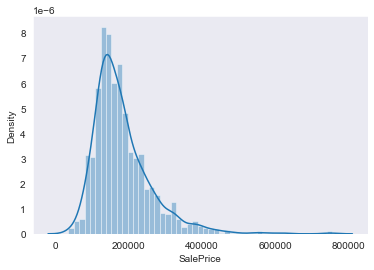

In [761]:
y = df["SalePrice"]
sns.distplot(y)

The distribution of the target variable looks skewed to the right, taking the log plot

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

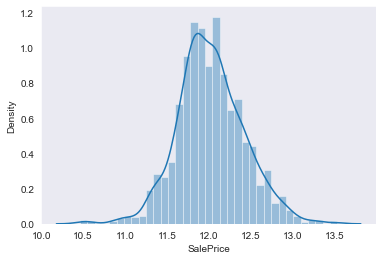

In [762]:
sns.distplot(np.log(y)) #Creating a log plot of the target variable for observation

Compared to the regular distribution plot the log plot appears more normally distributed and more workable

**Segregating numeical and categorical features for further analysis**

In [763]:
num_feat = list(df.select_dtypes(exclude="object").columns) # Variable for numerical variables
cat_feat = list(df.select_dtypes(include="object").columns) # Variable for categorical variables

In [764]:
len(num_feat)

37

In [765]:
len(cat_feat)

43

In [766]:
targ = ['SalePrice']

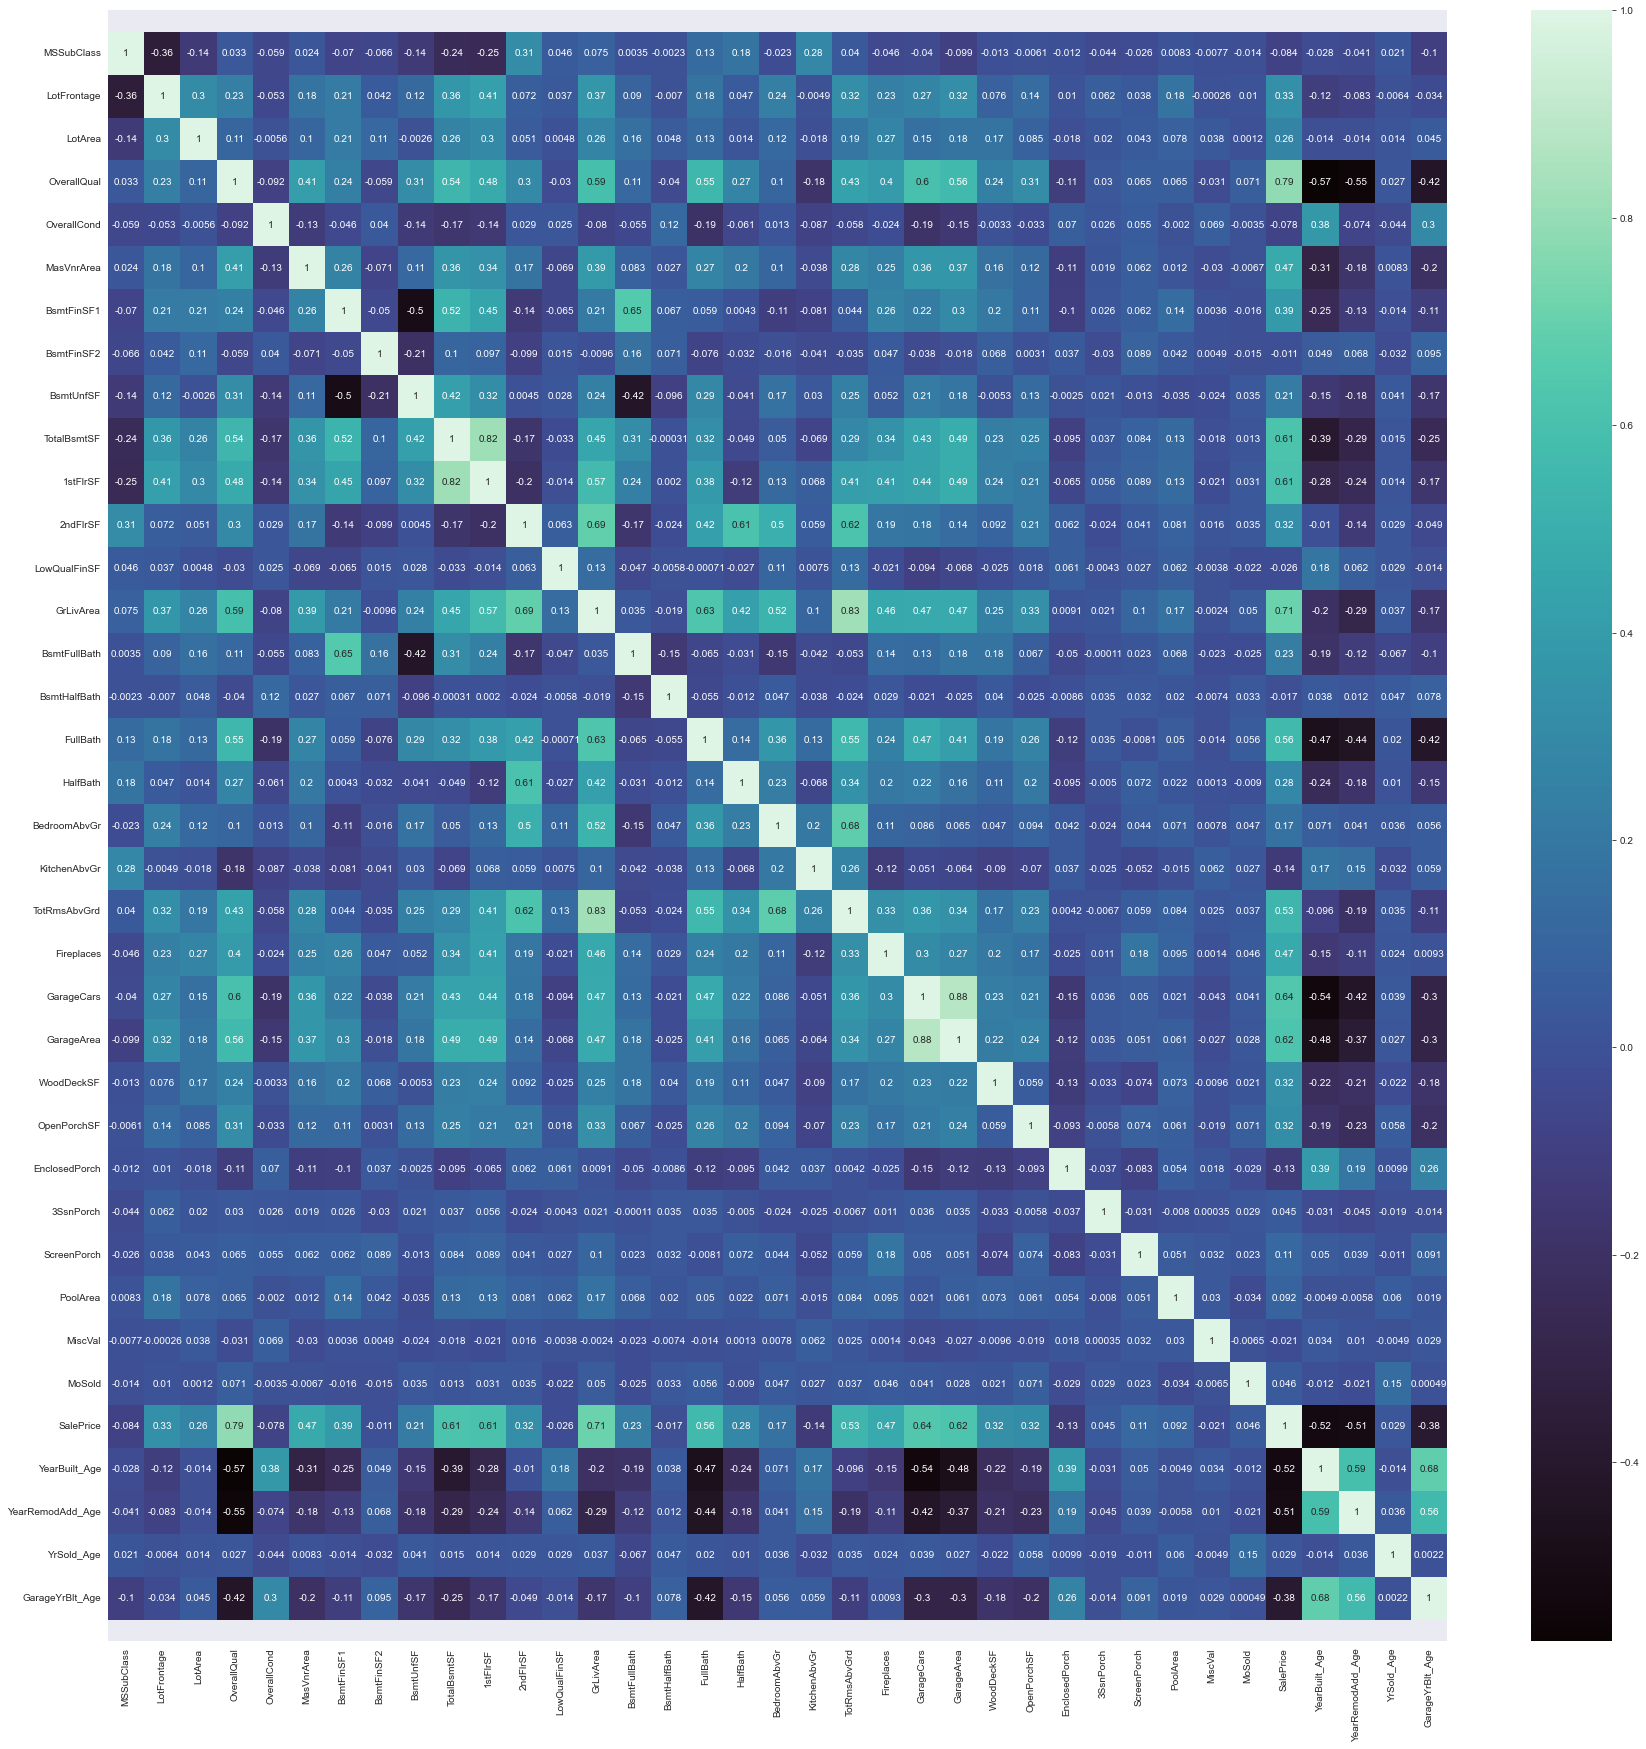

In [767]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.corr(), cmap="mako",
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show() # Observing the correlation of all the numerical variables

In [768]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
hi_corr = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
#df.drop(hi_corr, axis=1, inplace=True)

In [769]:
hi_corr

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

These variables have a high coorelation value and weather to drop them or not wil be decided after further analysis

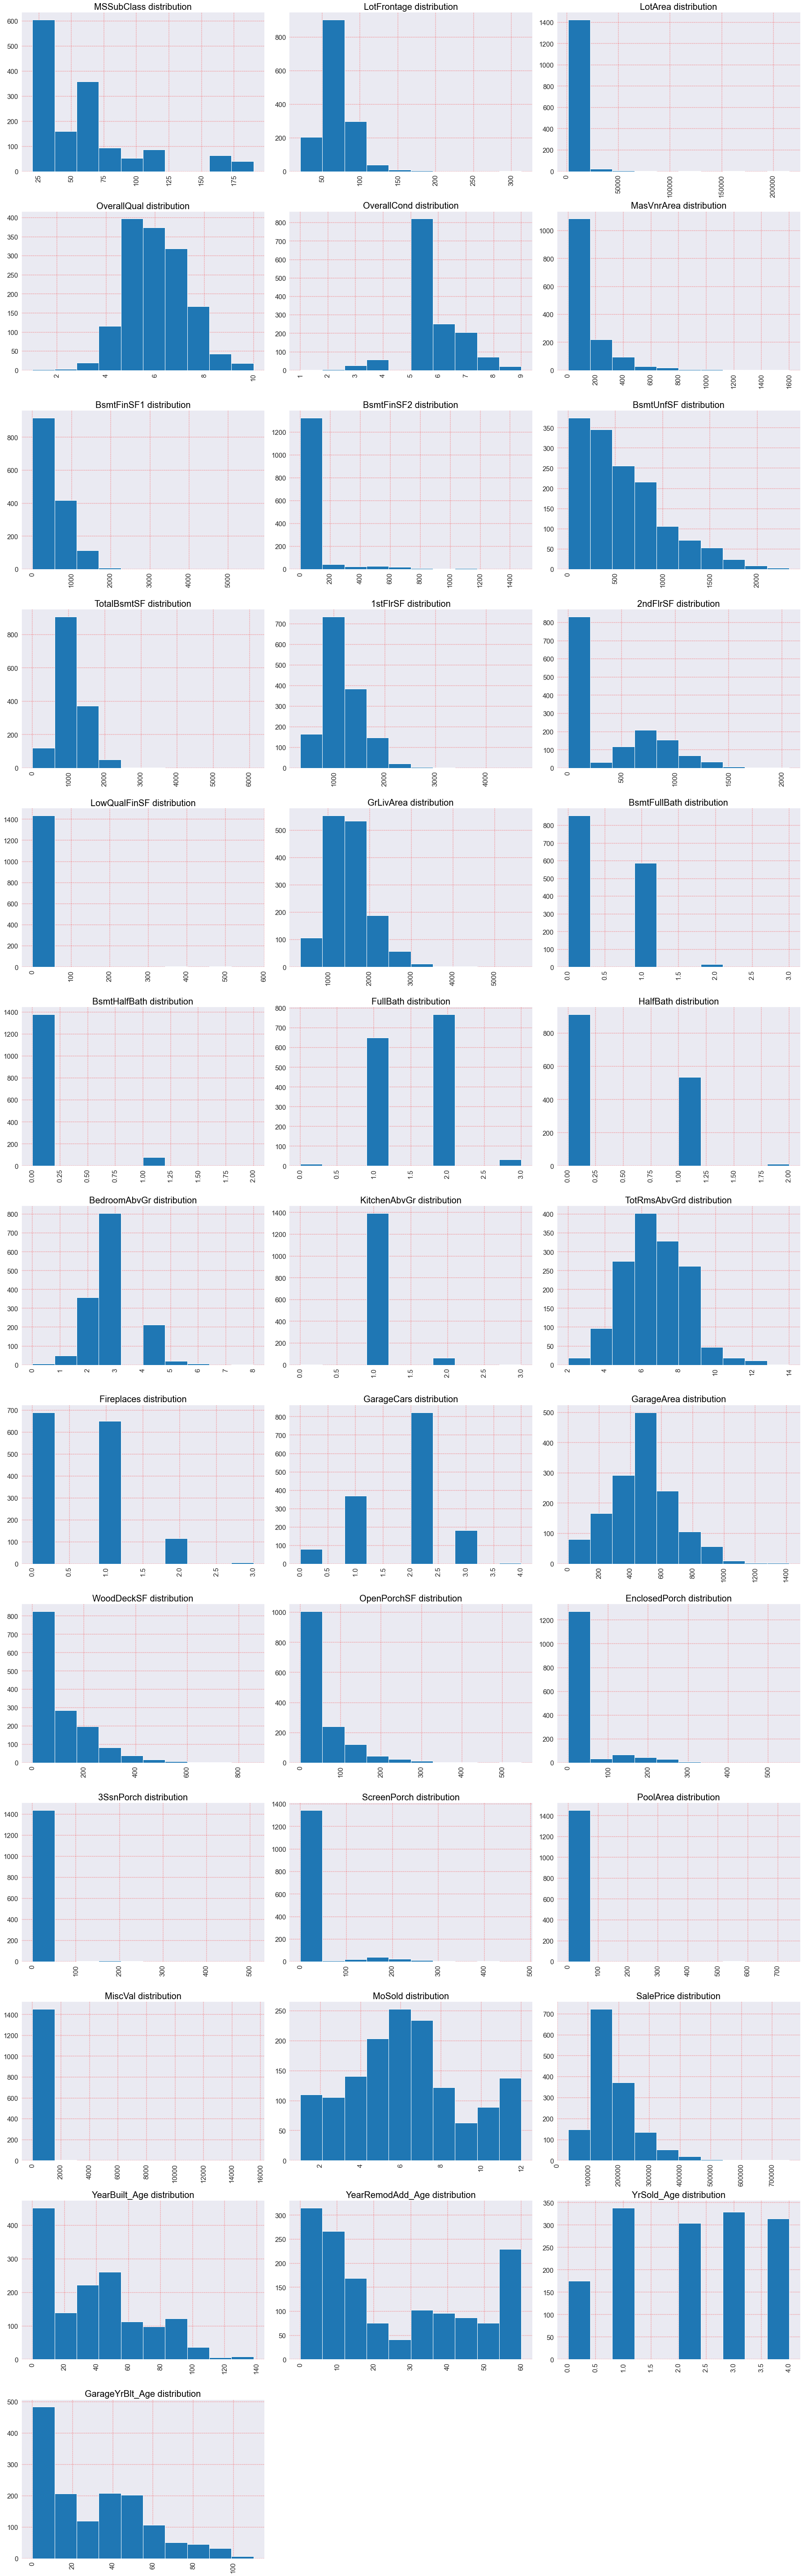

In [770]:
# Creating Histograms of numerical features for EDA
# Plot barplots
ln=len(num_feat)

# calculation for subplots
n=3
m=(ln//n)+1
ct=1

# Sort dataframe by price    
housing_byprice = df.sort_values(by="SalePrice")

# Setting figure size
plt.figure(2,figsize=(25,80))

for cat in num_feat:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    x=housing_byprice[cat]

    plt.hist(x)
    title = cat + " distribution"
    plt.title(title,color="black",fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [771]:
cat_feat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

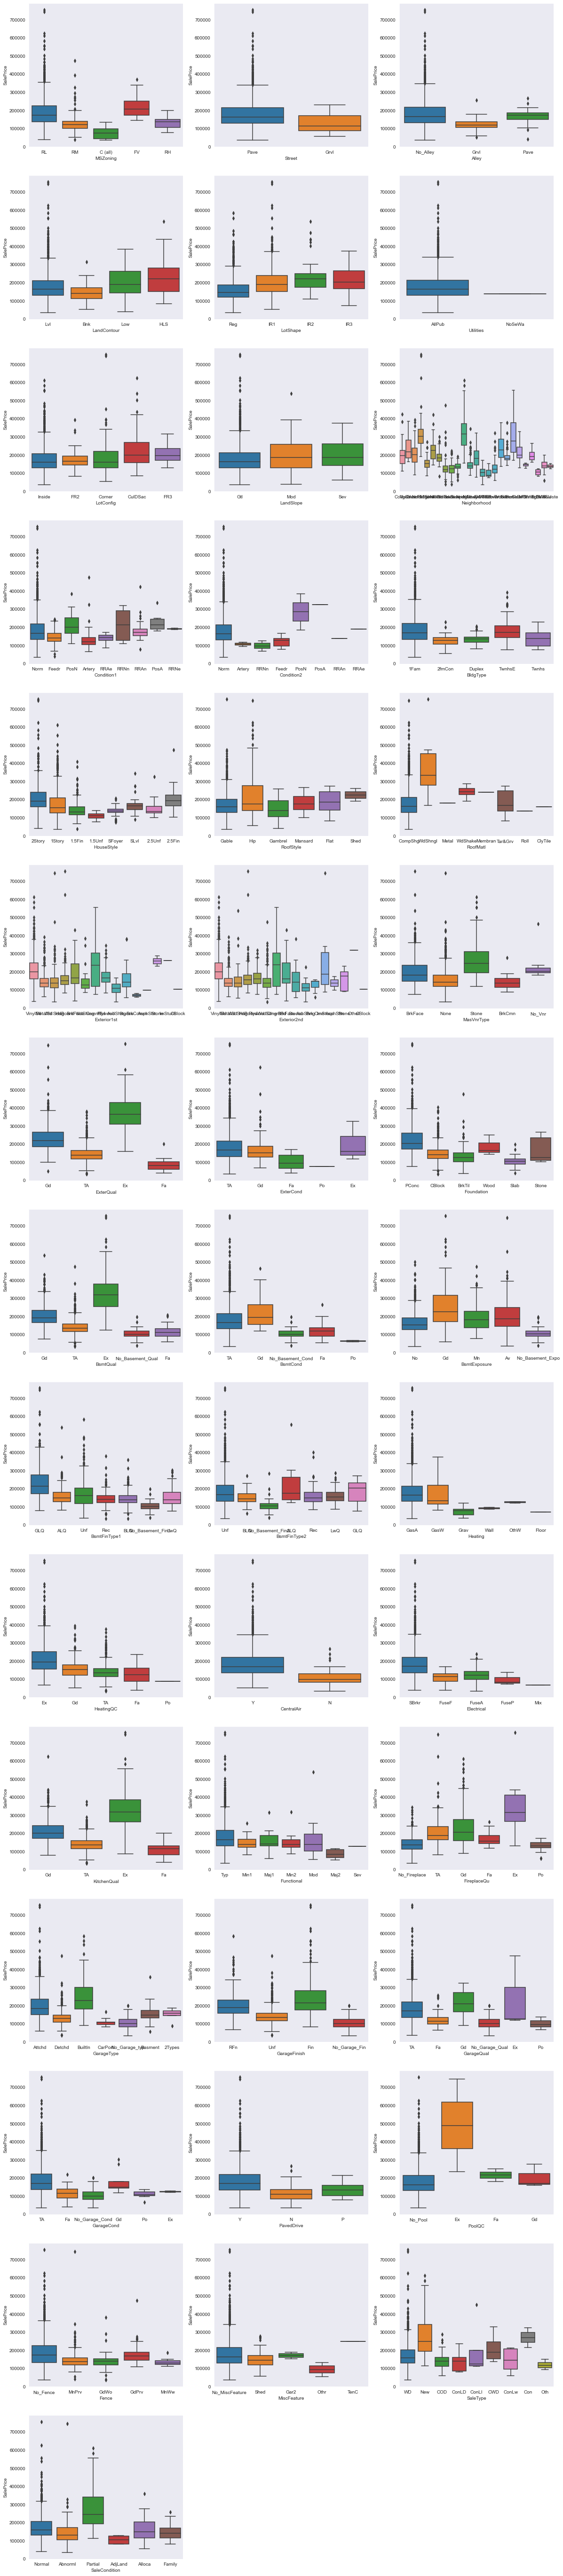

In [772]:
# Creating Boxplots of Categorical variables vs Target variable to check for the distribution of the central tendecies and outliers
plt.figure(figsize =(20, 100))
plt.title(title,color="black",fontsize=20)

plt.subplot(15, 3, 1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)

plt.subplot(15, 3, 2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = df)

plt.subplot(15, 3, 3)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = df)

plt.subplot(15, 3, 4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df)

plt.subplot(15, 3, 5)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df)

plt.subplot(15, 3, 6)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = df)

plt.subplot(15, 3, 7)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df)

plt.subplot(15, 3, 8)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = df)

plt.subplot(15, 3, 9)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)

plt.subplot(15, 3, 10)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df)

plt.subplot(15, 3, 11)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df)

plt.subplot(15, 3, 12)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df)

plt.subplot(15, 3, 13)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df)

plt.subplot(15, 3, 14)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df)

plt.subplot(15, 3, 15)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = df)

plt.subplot(15, 3, 16)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df)

plt.subplot(15, 3, 17)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df)

plt.subplot(15, 3, 18)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df)

plt.subplot(15, 3, 19)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df)

plt.subplot(15, 3, 20)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = df)

plt.subplot(15, 3, 21)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df)

plt.subplot(15, 3, 22)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)

plt.subplot(15, 3, 23)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = df)

plt.subplot(15, 3, 24)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df)

plt.subplot(15, 3, 25)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df)

plt.subplot(15, 3, 26)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = df)

plt.subplot(15, 3, 27)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = df)

plt.subplot(15, 3, 28)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = df)

plt.subplot(15, 3, 29)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = df)

plt.subplot(15, 3, 30)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = df)

plt.subplot(15, 3, 31)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df)

plt.subplot(15, 3, 32)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df)

plt.subplot(15, 3, 33)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df)

plt.subplot(15, 3, 34)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df)

plt.subplot(15, 3, 35)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)

plt.subplot(15, 3, 36)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df)

plt.subplot(15, 3, 37)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df)

plt.subplot(15, 3, 38)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = df)

plt.subplot(15, 3, 39)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = df)

plt.subplot(15, 3, 40)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = df)

plt.subplot(15, 3, 41)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = df)

plt.subplot(15, 3, 42)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df)

plt.subplot(15, 3, 43)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df)





In [773]:
num_feat

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'YrSold_Age',
 'GarageYrBlt_Age']

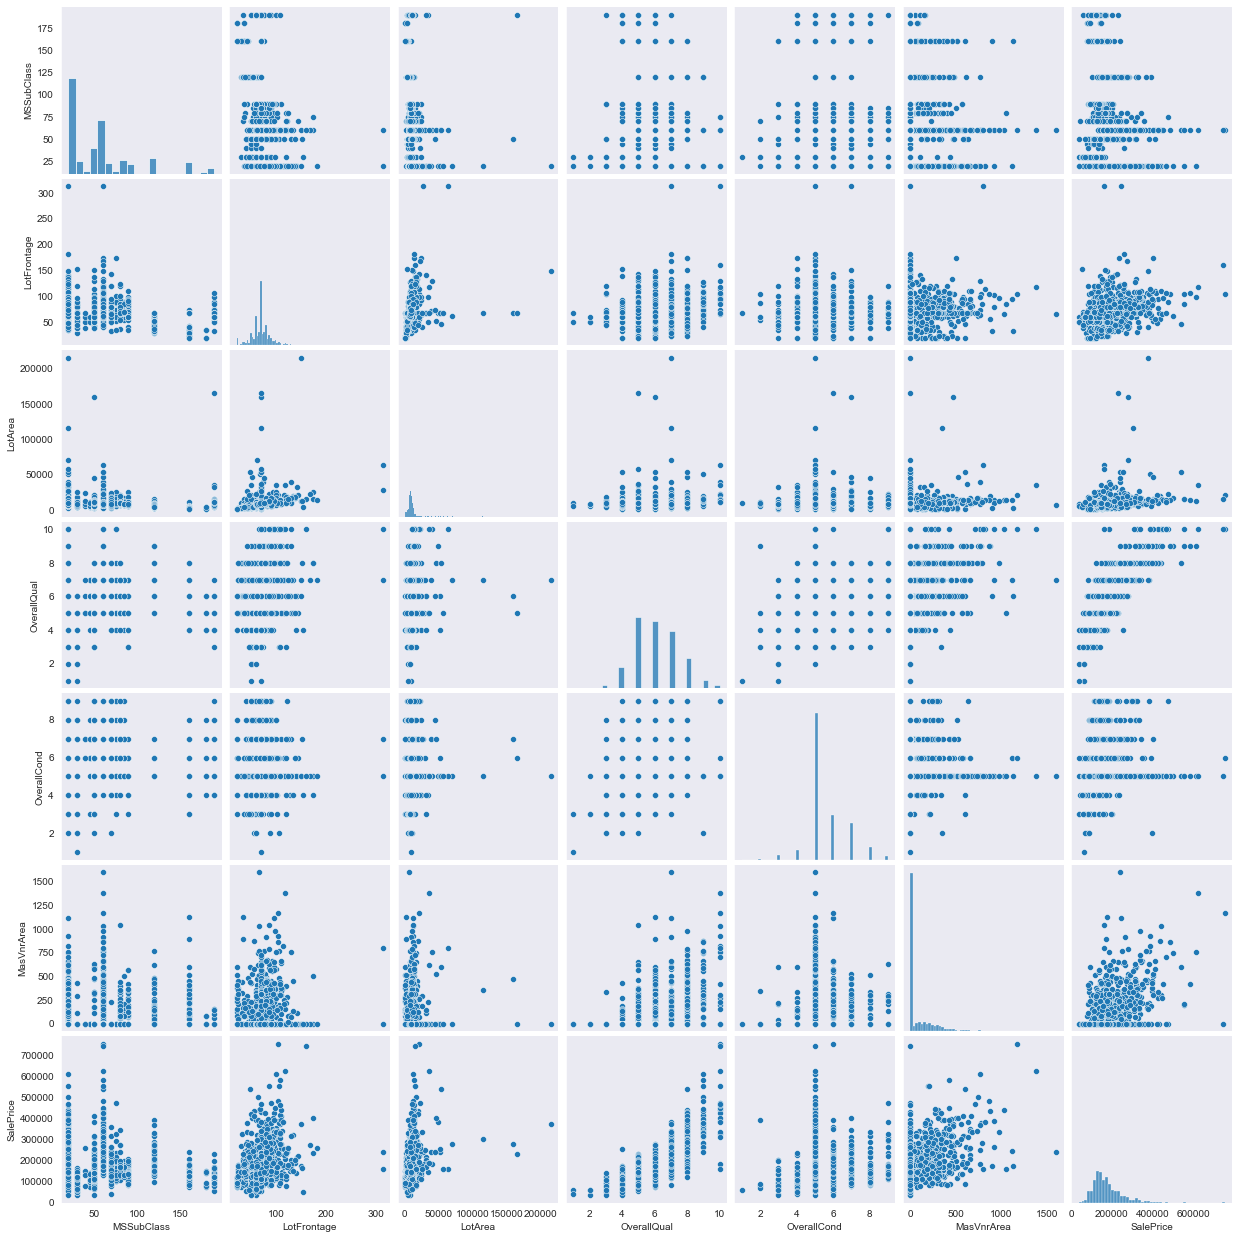

In [774]:
# Pairplot of fewer features with the target variable for more clear observations
numeric_vars=df[[ 
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'SalePrice'   ]]
sns.pairplot(numeric_vars)
plt.show()

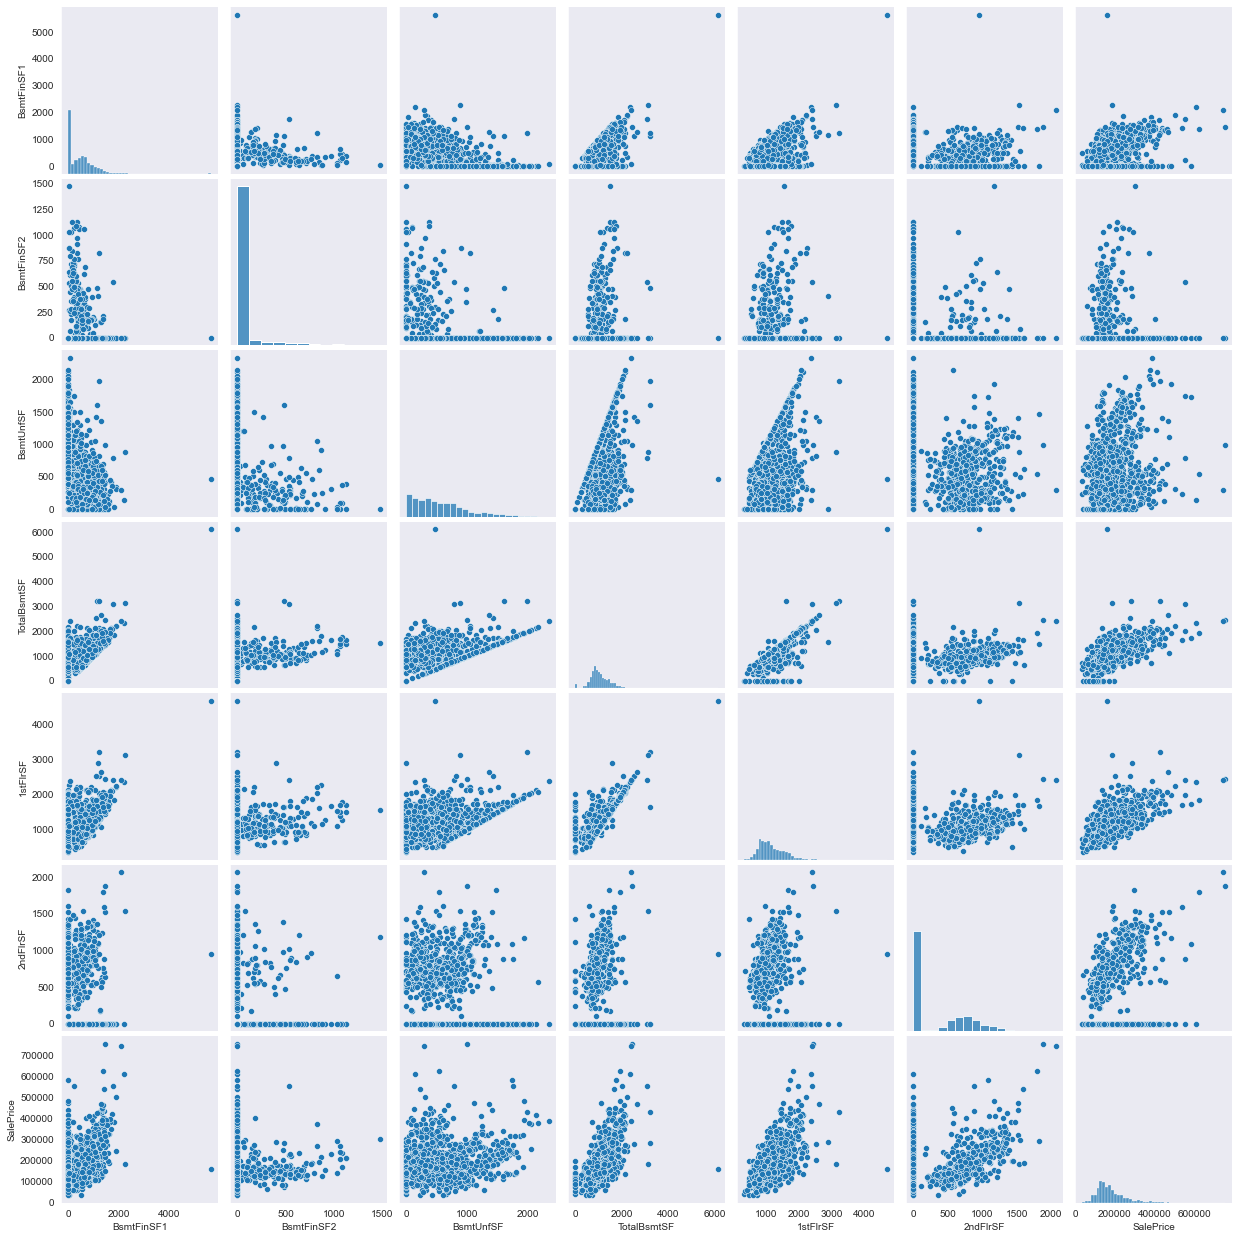

In [775]:
# Pairplot of fewer features with the target variable for more clear observations

numeric_vars=df[[ 
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'SalePrice'   ]]
sns.pairplot(numeric_vars)
plt.show()

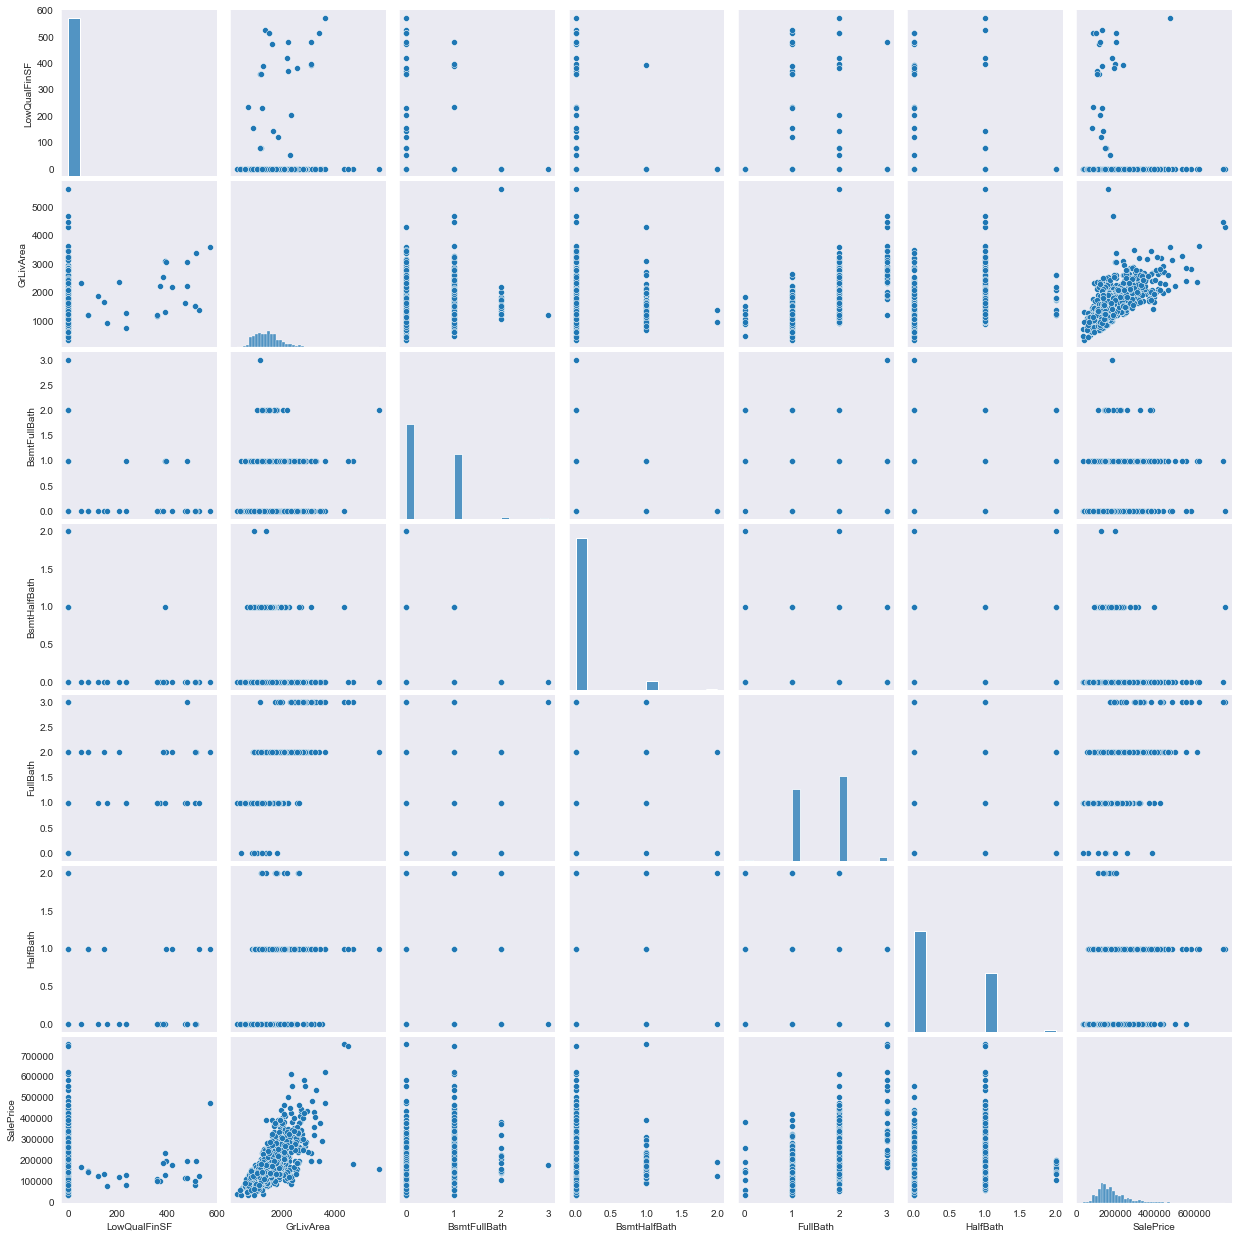

In [776]:
# Pairplot of fewer features with the target variable for more clear observations
numeric_vars=df[[ 
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'SalePrice'   ]]
sns.pairplot(numeric_vars)
plt.show()

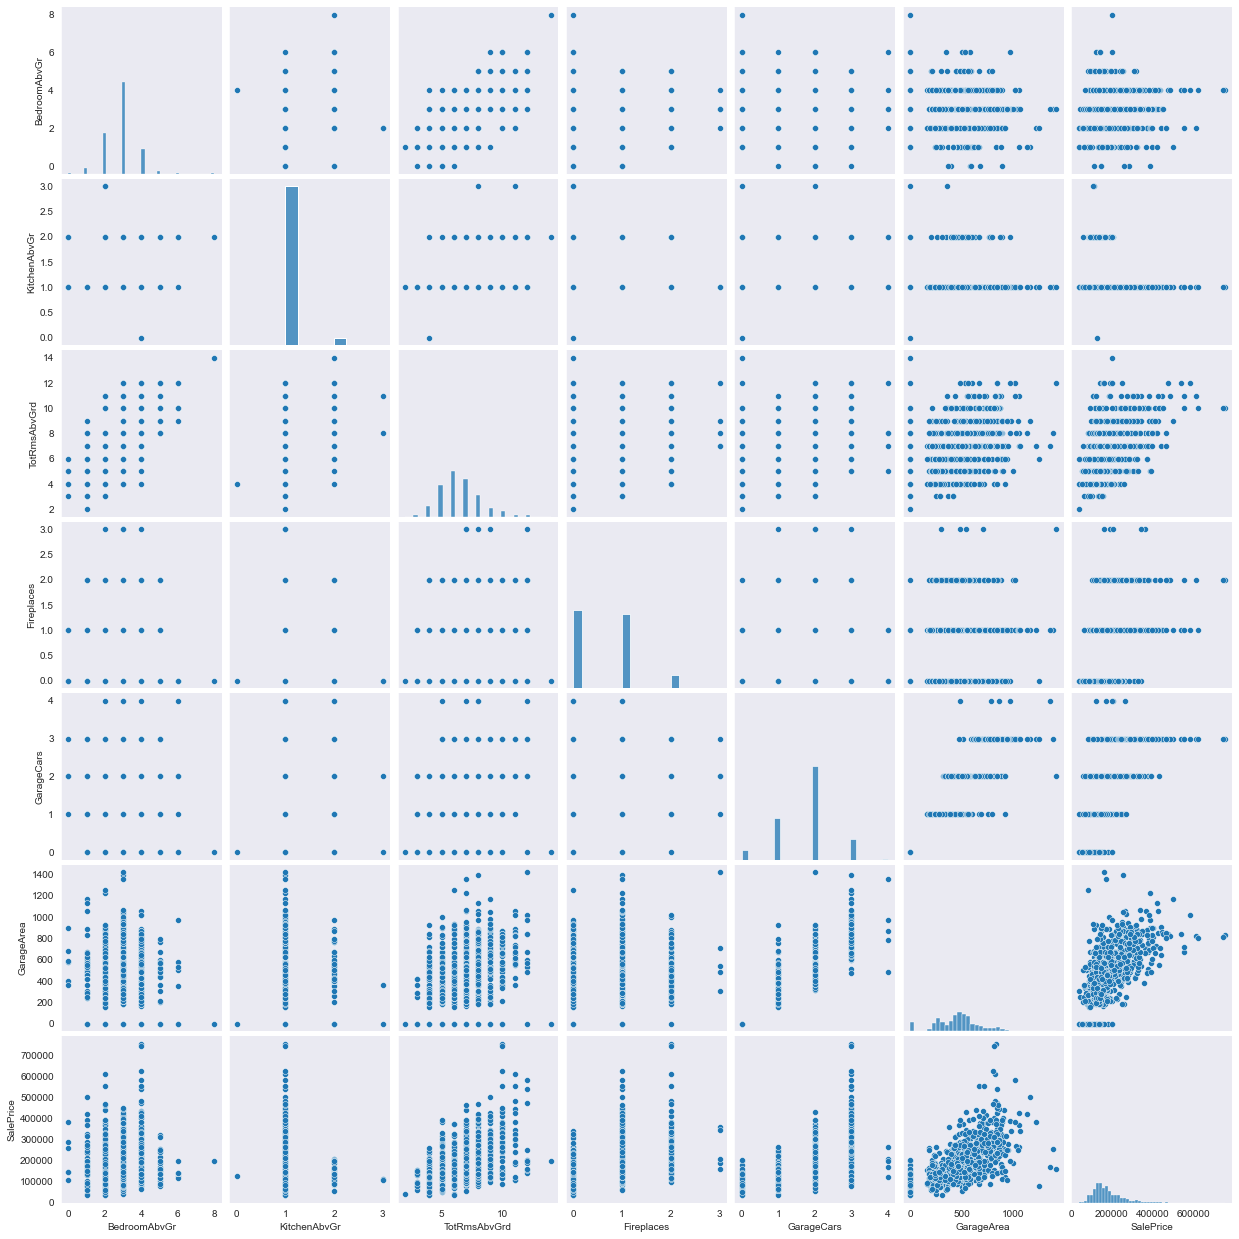

In [777]:
# Pairplot of fewer features with the target variable for more clear observations
numeric_vars=df[[ 
'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'SalePrice'   ]]
sns.pairplot(numeric_vars)
plt.show()

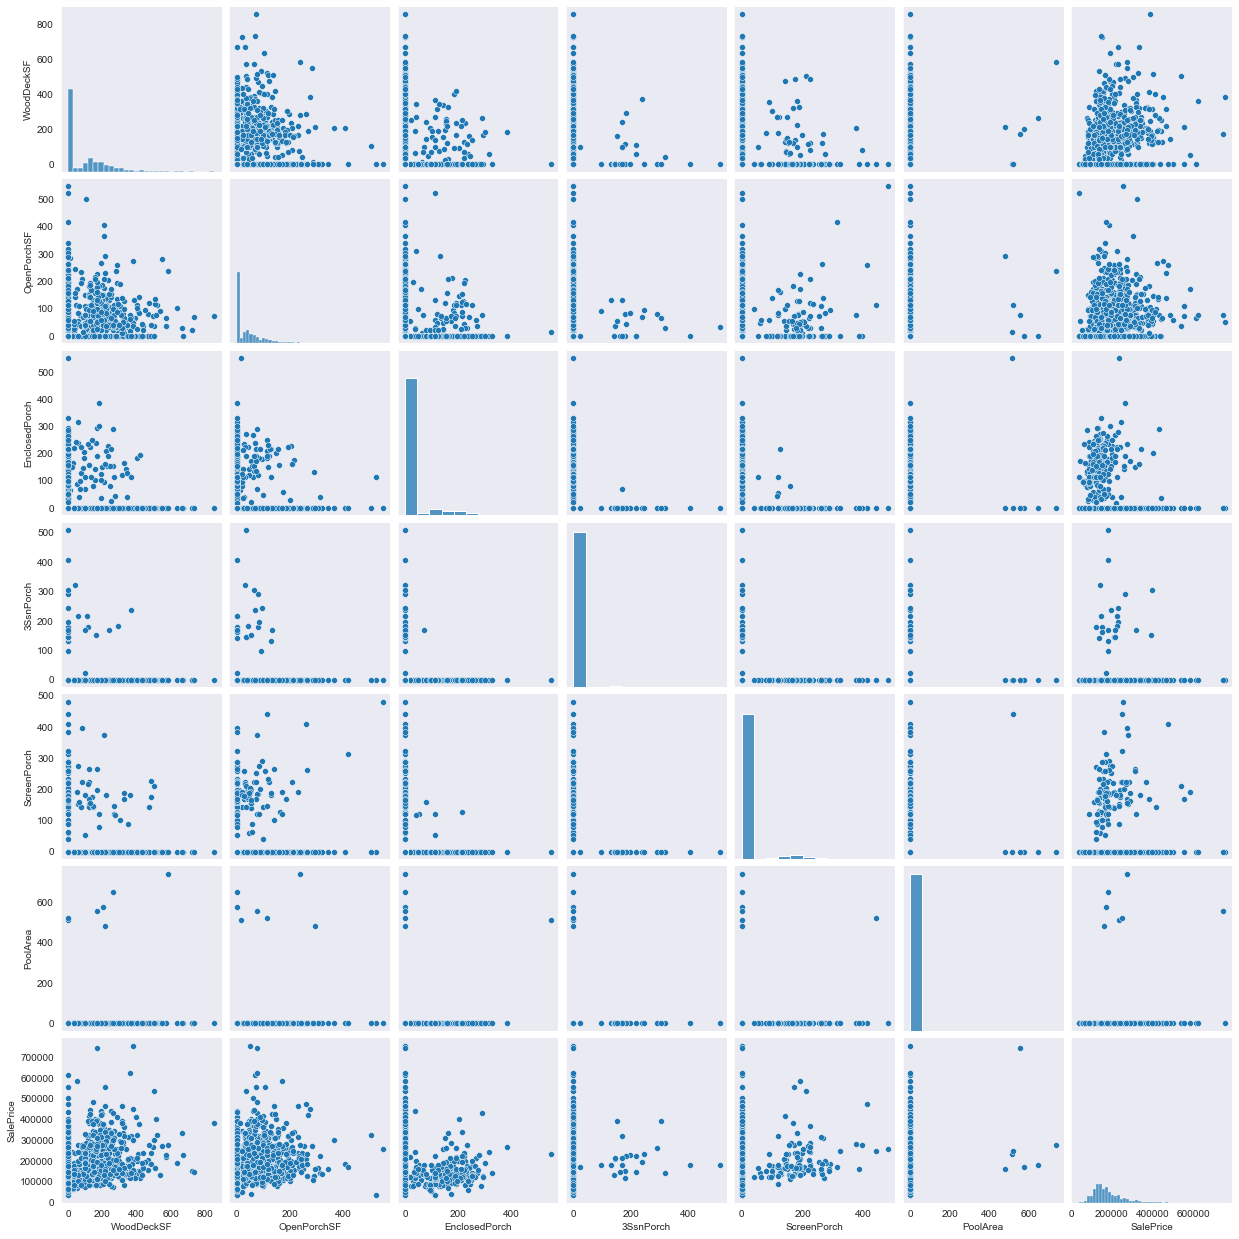

In [778]:
# Pairplot of fewer features with the target variable for more clear observations
numeric_vars=df[[ 
  'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice'   ]]
sns.pairplot(numeric_vars)
plt.show()

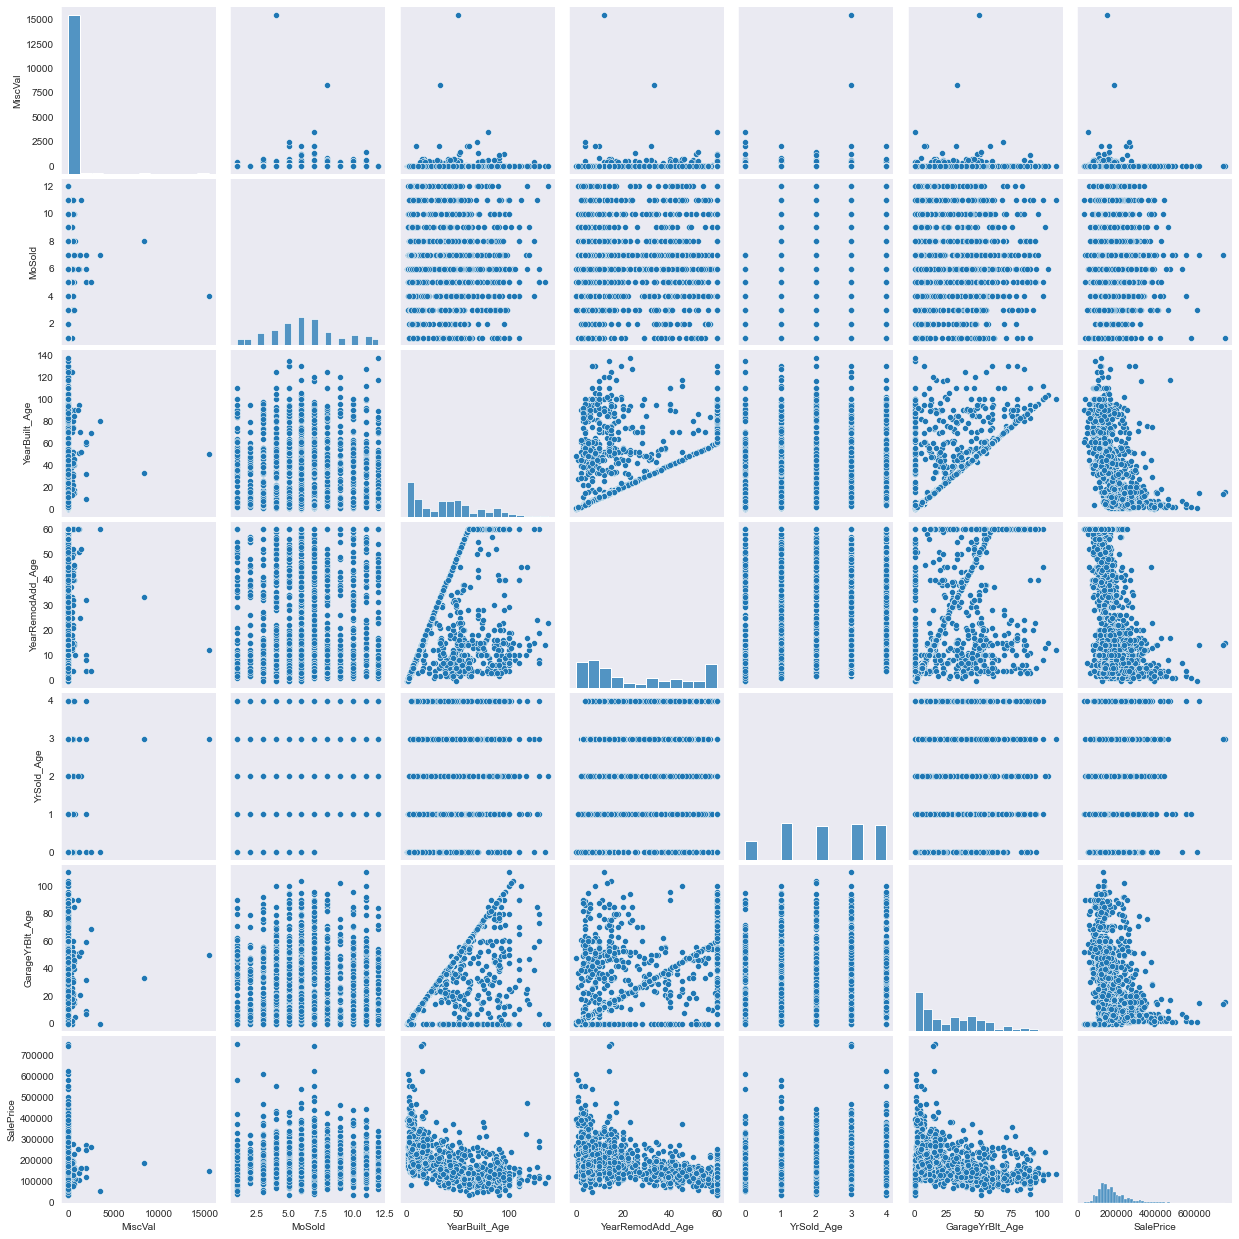

In [779]:
# Pairplot of fewer features with the target variable for more clear observations
numeric_vars=df[[ 
 'MiscVal',
 'MoSold',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'YrSold_Age',
 'GarageYrBlt_Age',
 'SalePrice'   ]]
sns.pairplot(numeric_vars)
plt.show()

## Model Building

In [780]:
df = pd.get_dummies(df, columns=cat_feat, drop_first = True) #Creating Dummy variables for the categorical variables
df.shape

(1460, 261)

In [781]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  YearBuilt_Age  YearRemodAdd_Age  \
0         0        0       2     208500            7.0               7.0   
1         0        0       5     181500           34.0              34.0   
2         0        0       9     223500            9.0               8.0   
3         0        0       2     140000           95.0              40.0   
4         0        0      12     250000           10.0              10.0   

   YrSold_Age  GarageYrBlt_Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0         2.0              7.0            0            0            1   
1         3.0             34.0            0            0            1   
2         2.0              9.0            0            0            1   
3         4.0             12.0            0            0            1   
4         2.0             10.0            0            0            1   

   MSZoning_RM  Street_Pave  Alley_No_Alley  Alley_Pave  LotShape_IR2  \
0            0            1               1           0             0   
1            0            1               1           0             0   
2            0            1               1           0             0   
3            0            1               1           0             0   
4            0            1               1           0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0  

In [782]:
# Split data into housing train and test
df_train, df_test = train_test_split(df, train_size=0.70, test_size=0.30, random_state=100)
df_train.shape, df_test.shape

((1021, 261), (438, 261))

In [783]:
# Identify columns to scale
scale_feat = num_feat.copy()
scale_feat.remove("SalePrice")

In [784]:
# Scale training data using StandardScaler

scaler = StandardScaler()

# Scale training data using scaler
df_train[scale_feat] = scaler.fit_transform(df_train[scale_feat])

# Scale test data using scaler
df_test[scale_feat] = scaler.transform(df_test[scale_feat])

In [785]:
# Create X and y
y_train = np.log(df_train.pop("SalePrice")) #Coverting the target variable into log form for a more normalised distribution
X_train = df_train
y_train.shape, X_train.shape

((1021,), (1021, 260))

In [786]:
# Create X and y (Test dataset)
y_test = np.log(df_test.pop("SalePrice")) #Coverting the target variable into log form for a more normalised distribution
X_test = df_test
y_test.shape, X_test.shape

((438,), (438, 260))

In [787]:
# Making a copy of X_train, X_test, y_train, y_test
X_train2 = X_train.copy()
X_test2 = X_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

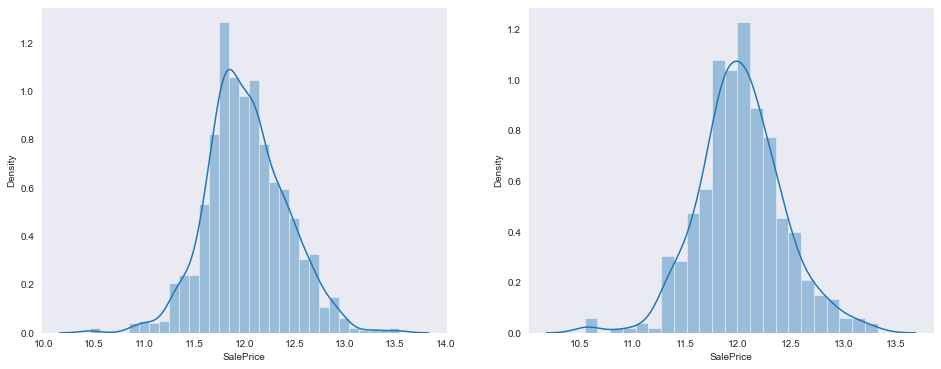

In [788]:
# Observing te distribution of the target variables after converting to log form
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(y_train)
plt.subplot(122)
sns.distplot(y_test)

In [789]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [790]:
# Print results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.005785  3.987554e-04         0.002592    4.886361e-04      0.0001   
1        0.005386  4.888307e-04         0.002194    3.988028e-04       0.001   
2        0.005388  4.866326e-04         0.002391    4.905250e-04        0.01   
3        0.004987  2.132481e-07         0.002393    4.885195e-04        0.05   
4        0.005785  3.987562e-04         0.003191    3.988507e-04         0.1   
5        0.005187  3.983793e-04         0.002392    4.873154e-04         0.2   
6        0.005779  7.532448e-04         0.002194    3.985884e-04         0.3   
7        0.005186  3.988982e-04         0.002194    3.989697e-04         0.4   
8        0.005386  4.889865e-04         0.002393    4.887140e-04         0.5   
9        0.005387  4.873030e-04         0.002392    4.870270e-04         0.6   
10       0.005385  4.886751e-04         0.002593    4.888697e-04         0.7   
11       0.006183  7.459964e-04         0.001995    1.507891e-07         0.8   
12       0.005585  4.888307e-04         0.002393    4.886555e-04         0.9   
13       0.005386  4.894157e-04         0.002592    4.893768e-04         1.0   
14       0.005187  4.037512e-04         0.002391    4.860563e-04         2.0   
15       0.005186  3.989459e-04         0.002393    4.886946e-04         3.0   
16       0.004993  1.187564e-05         0.002187    4.022731e-04         4.0   
17       0.004987  9.536743e-08         0.002393    4.886166e-04         5.0   
18       0.004987  1.545203e-03         0.002593    4.888502e-04         6.0   
19       0.004987  1.168008e-07         0.002394    4.886361e-04         7.0   
20       0.005386  4.887139e-04         0.002194    3.989220e-04         8.0   
21       0.006184  7.464421e-04         0.002593    4.885971e-04         9.0   
22       0.005386  7.977963e-04         0.001995    2.861023e-07        10.0   
23       0.005585  7.980347e-04         0.002393    4.885192e-04          20   
24       0.004987  1.784161e-07         0.002393    4.886751e-04          50   
25       0.005386  4.888698e-04         0.002393    4.885776e-04         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.090951          -0.095674   
1    {'alpha': 0.001}          -0.090589          -0.095630   
2     {'alpha': 0.01}          -0.089994          -0.095310   
3     {'alpha': 0.05}          -0.089549          -0.094436   
4      {'alpha': 0.1}          -0.089421          -0.093924   
5      {'alpha': 0.2}          -0.090039          -0.093703   
6      {'alpha': 0.3}          -0.090603          -0.093698   
7      {'alpha': 0.4}          -0.091174          -0.093757   
8      {'alpha': 0.5}          -0.091561          -0.093859   
9      {'alpha': 0.6}          -0.091827          -0.093939   
10     {'alpha': 0.7}          -0.092072          -0.093999   
11     {'alpha': 0.8}          -0.092242          -0.094064   
12     {'alpha': 0.9}          -0.092352          -0.094142   
13     {'alpha': 1.0}          -0.092424          -0.094199   
14     {'alpha': 2.0}          -0.092273          -0.094451   
15     {'alpha': 3.0}          -0.092145          -0.094736   
16     {'alpha': 4.0}          -0.091852          -0.095017   
17     {'alpha': 5.0}          -0.091556          -0.095265   
18     {'alpha': 6.0}          -0.091268          -0.095493   
19     {'alpha': 7.0}          -0.091145          -0.095676   
20     {'alpha': 8.0}          -0.091011          -0.095818   
21     {'alpha': 9.0}          -0.090863          -0.095944   
22    {'alpha': 10.0}          -0.090741          -0.096055   
23      {'alpha': 20}          -0.090353          -0.096998   
24      {'alpha': 50}          -0.089230          -0.099197   
25     {'alpha': 100}          -0.087636          -0.101226   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.095048          -0.088972          -0.083266  

In [791]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08904728738413298


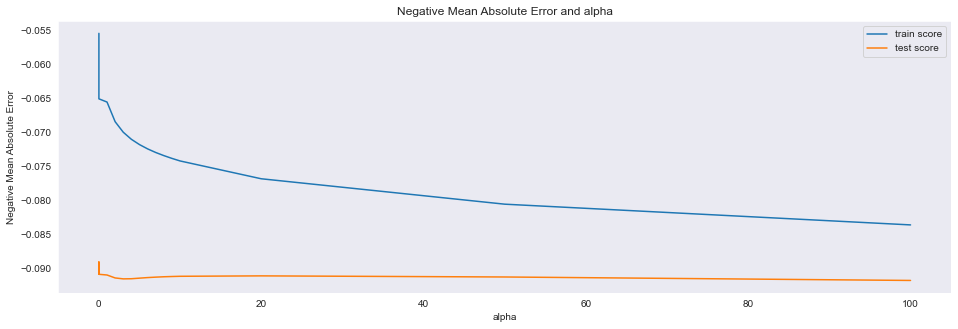

In [792]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [793]:
# Determine best alpha
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is {0} at alpha = {1}".format(best_ridge_score, best_ridge_alpha))

 The best r2 score is -0.08904728738413298 at alpha = 0.1


Ridge with alpha 0.1

In [794]:
#ridge model with alpha 10
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.85130267e-02,  4.88475878e-03,  2.94874827e-02,  5.70863576e-02,
        3.75665934e-02,  1.04980168e-04,  2.72420398e-02,  8.52262600e-03,
        6.86837319e-03,  3.74691259e-02,  4.65183073e-02,  4.73165683e-02,
        1.69401208e-04,  7.35309795e-02,  1.46330617e-02,  6.31543665e-04,
        6.24993357e-03,  2.39200581e-03,  9.50816011e-03, -1.36900222e-02,
        3.71556352e-03, -2.47371291e-03,  1.98432998e-02,  1.79154177e-02,
        1.05876270e-02,  3.96945526e-03,  6.95415504e-03,  4.74194483e-03,
        7.99778227e-03,  1.15115266e-02,  2.75408884e-03,  1.17873589e-03,
       -5.49407561e-02, -2.31318212e-02,  3.26196512e-03,  1.74112832e-03,
        3.99688804e-01,  3.94177396e-01,  4.00503403e-01,  3.53754203e-01,
        8.76265249e-02,  2.13948681e-02,  3.93778665e-02,  1.39000176e-02,
       -2.74940462e-02,  6.83392828e-03,  1.94532202e-02,  1.42454289e-02,
        3.47009463e-02, -9.68426339e-02,  3.29079673e-02, -4.38956081e-02,
       -1.63795898e-02, -

In [795]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.95767447384398


In [796]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7456722342096901


In [797]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.041847120219446046

- r2 train = 0.95
- r2 test  = 0.74
- Model with alpha 0.1 is over fitting

Model with alpha 1

In [798]:
#ridge model with alpha 10
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13112383e-02, -4.32290392e-03,  2.19051632e-02,  6.61456226e-02,
        3.66047358e-02, -2.21098068e-03,  7.30071294e-03,  6.87724292e-03,
        4.51386351e-03,  1.43628968e-02,  4.19520763e-02,  4.49732593e-02,
        1.29528056e-03,  6.82996346e-02,  2.23326431e-02,  1.11169158e-03,
        1.34135733e-02,  6.55219105e-03,  1.21967554e-02, -1.35315532e-02,
        9.47852711e-03, -4.19009368e-03,  3.45916548e-02,  8.65037486e-03,
        1.16210743e-02,  1.63282015e-03,  8.74992253e-03,  6.99574831e-03,
        9.50458986e-03, -5.48285491e-03,  1.35216742e-03, -4.67984060e-04,
       -3.97605101e-02, -2.15270236e-02,  4.01758851e-03,  6.45547528e-03,
        2.06330217e-01,  2.09912571e-01,  2.26124619e-01,  1.96276416e-01,
        6.79712262e-02,  1.14034631e-02,  3.40801572e-02,  1.95158359e-02,
       -5.57907032e-02,  7.19500823e-03,  5.08060214e-02,  5.13352729e-02,
        5.93735643e-02, -6.76955914e-02,  3.44612460e-02, -5.34231089e-02,
       -3.34368053e-02, -

In [799]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9435851136219882


In [800]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8610291857418307


In [801]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.02286627397203161

- r2 train = 0.94
- r2 test  = 0.86
- Model with alpha 1 is over fitting

Ridge with alpha 10

In [802]:
#ridge model with alpha 10
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.35848353e-02, -8.34376541e-03,  1.85009727e-02,  7.94596056e-02,
        4.08159358e-02, -2.18474793e-03, -2.43956051e-04,  7.30447635e-03,
        4.73305005e-03,  7.09611308e-03,  3.64272295e-02,  4.28105719e-02,
        1.31446151e-03,  6.23986409e-02,  2.89439364e-02,  2.14244503e-03,
        1.85043169e-02,  1.08600489e-02,  1.21480841e-02, -1.21098632e-02,
        1.64166496e-02,  1.62324461e-03,  4.13316539e-02,  6.42696530e-03,
        1.30942523e-02, -1.57919989e-03,  9.28597603e-03,  7.76592544e-03,
        1.04467534e-02, -1.35329899e-02,  8.31595766e-05, -1.22174581e-03,
       -3.83319033e-02, -2.19030921e-02,  6.39252198e-03,  6.58482596e-03,
        5.08549387e-02,  3.91399019e-02,  6.43401413e-02,  1.60150779e-02,
        2.67018077e-02,  3.39655542e-03,  2.37653709e-02,  2.17719495e-02,
       -4.27316465e-02,  4.03217778e-03,  3.69638110e-02,  3.68873536e-02,
        4.66916563e-02, -1.29658126e-02,  3.22470360e-02, -3.76947673e-02,
       -8.78637733e-03, -

In [803]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.9223634290710341
0.8854325644637531


0.01885093919344935

- r2 train = 0.92
- r2 test  = 0.88
- Model with alpha 10 is slightly over fitting and still can be improved

Ridge model with alpha 100

In [804]:
#ridge model with alpha 100
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.99848449e-02, -4.54613220e-03,  1.59075982e-02,  8.25279395e-02,
        4.04256072e-02,  4.77178700e-03,  8.06613685e-03,  6.25789483e-03,
        6.83512866e-03,  1.71758515e-02,  3.14980829e-02,  2.85098534e-02,
        1.96911348e-03,  4.70694730e-02,  2.88589496e-02,  3.29081985e-03,
        2.38475539e-02,  1.54674219e-02,  1.00625769e-02, -1.23629477e-02,
        2.33393688e-02,  1.91799782e-02,  3.47809827e-02,  1.70120447e-02,
        1.38246295e-02, -2.00650062e-03,  5.99173482e-03,  7.09484628e-03,
        1.08977465e-02, -1.81177410e-02, -1.42535187e-03, -5.13351242e-04,
       -3.44058244e-02, -2.61791512e-02,  8.11602756e-03,  5.10594737e-04,
        1.64256565e-02,  4.36033085e-03,  2.49545492e-02, -2.26847613e-02,
        5.51531050e-03,  2.41323348e-03,  8.31886287e-03,  7.12773426e-03,
       -1.25822214e-02, -3.62297440e-03,  8.11739079e-03,  1.00917087e-02,
        9.72764069e-03, -1.77611278e-03,  1.63186704e-02, -7.95683454e-03,
       -8.77302130e-04, -

In [805]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train.columns
cols = cols.insert(0, "constant")

ridge_coef = pd.DataFrame(model_parameters,cols)
ridge_coef.reset_index(inplace=True)
ridge_coef.columns = ["Feature","Value"]
ridge_coef.sort_values(by="Value",inplace=True,ascending=False)
ridge_coef.head(10)

Feature   Value
0               constant  11.877
4            OverallQual   0.083
14             GrLivArea   0.047
5            OverallCond   0.040
23            GarageCars   0.035
82       Condition1_Norm   0.033
11              1stFlrSF   0.031
62  Neighborhood_Crawfor   0.031
15          BsmtFullBath   0.029
12              2ndFlrSF   0.029

In [806]:
ridge_coef.shape

(261, 2)

In [807]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
# Printing the RMSE value
print(mean_squared_error(y_test, y_test_pred))

y_train_pred_ridge = y_train_pred
y_test_pred_ridge = y_test_pred

0.8964597285033356
0.8789097191832093
0.01992420891600421


In [808]:
# Creating Variables for different Predicted scores of the model
final_ridge_r2_train = round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred),4) * 100
final_ridge_r2_test = round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred),4) * 100
final_ridge_mse = round(mean_squared_error(y_test, y_test_pred),4) * 100


### Lasso Regression

In [809]:
#lasso
params = {'alpha': [0.00001, 0.00005, 0.0001,0.0002, 0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train2, y_train2)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0005, 0.001,
                                   0.002, 0.003, 0.004, 0.005, 0.006, 0.007,
                                   0.008]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [810]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [811]:
# Observing different scores of the model
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.068816  1.694885e-02         0.002792        0.000399     0.00001   
1        0.049468  2.483837e-02         0.002792        0.000746     0.00005   
2        0.067819  3.013856e-02         0.002992        0.000631      0.0001   
3        0.073005  2.494072e-02         0.002194        0.000399      0.0002   
4        0.038696  2.221181e-03         0.002393        0.000489      0.0005   
5        0.019348  2.862897e-03         0.002194        0.000399       0.001   
6        0.011768  1.465830e-03         0.002593        0.000489       0.002   
7        0.009375  4.886166e-04         0.002194        0.000399       0.003   
8        0.008377  4.887918e-04         0.002194        0.000399       0.004   
9        0.008776  7.464039e-04         0.002793        0.000399       0.005   
10       0.006981  1.907349e-07         0.002593        0.000489       0.006   
11       0.007181  3.989935e-04         0.002194        0.000399       0.007   
12       0.006981  2.132481e-07         0.002394        0.000489       0.008   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.089579          -0.094307   
1    {'alpha': 5e-05}          -0.085976          -0.092681   
2   {'alpha': 0.0001}          -0.083020          -0.091841   
3   {'alpha': 0.0002}          -0.080104          -0.091759   
4   {'alpha': 0.0005}          -0.080990          -0.093768   
5    {'alpha': 0.001}          -0.084399          -0.095159   
6    {'alpha': 0.002}          -0.092156          -0.099091   
7    {'alpha': 0.003}          -0.092243          -0.102403   
8    {'alpha': 0.004}          -0.093452          -0.103617   
9    {'alpha': 0.005}          -0.094113          -0.104534   
10   {'alpha': 0.006}          -0.094773          -0.105358   
11   {'alpha': 0.007}          -0.095609          -0.106090   
12   {'alpha': 0.008}          -0.096361          -0.106586   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.093173          -0.085033          -0.081436        -0.088706   
1           -0.090697          -0.081975          -0.078091        -0.085884   
2           -0.089378          -0.079222          -0.074609        -0.083614   
3           -0.090523          -0.077406          -0.073477        -0.082654   
4           -0.093074          -0.075828          -0.076140        -0.083960   
5           -0.093710          -0.077780          -0.082944        -0.086798   
6           -0.098477          -0.082314          -0.092373        -0.092882   
7           -0.100786          -0.085960          -0.092902        -0.094859   
8           -0.102526          -0.089130          -0.093684        -0.096482   
9           -0.103867          -0.090785          -0.094620        -0.097584   
10          -0.104841          -0.092064          -0.095761        -0.098559   
11          -0.105761          -0.093166          -0.096814        -0.099488   
12          -0.106662          -0.094209          -0.097992        -0.100362   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.004867                6           -0.055404           -0.055476   
1         0.005392                4           -0.057135           -0.057068   
2         0.006350                2           -0.059272           -0.058672   
3         0.007254                1           -0.062524           -0.061383   
4         0.007942                3           -0.070404           -0.067272   
5         0.006628                5           -0.077571           -0.071570   
6         0.006039                7           -0.087091           -0.077914   
7         0.006032                8           -0.090273           -0.082319   
8         0.005630                9           -0.093585           -0.084335   
9         0.005565               10           -0.094992           -0.085651   
10        

In [812]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0002}
-0.08265369963427646


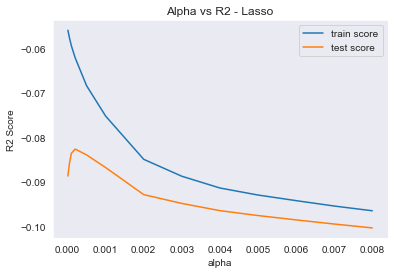

In [813]:
# plotting mean test and train scoes with alpha 
x=cv_results["param_alpha"]


y1=cv_results["mean_train_score"]
y2=cv_results["mean_test_score"]

plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("Alpha vs R2 - Lasso")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()


In [814]:
#lasso model with alpha 0.0002
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train2, y_train2) 



Lasso(alpha=0.0002)

In [815]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train2)
print(metrics.r2_score(y_true=y_train2, y_pred=y_train_pred))

#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test2)
print(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred))


mean_squared_error(y_test2, y_test_pred)

0.9509846737578265
0.6966779418938189


0.049908646786306896

In [816]:

#lasso model with alpha 0.001
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train2, y_train2) 


Lasso(alpha=0.001)

In [817]:

#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train2)
print(metrics.r2_score(y_true=y_train2, y_pred=y_train_pred))

#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test2)
print(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred))

mean_squared_error(y_test2, y_test_pred)


0.9171065908749879
0.8553938446611388


0.02379351365012375

In [818]:

#lasso model with alpha 0.002
alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train2, y_train2) 


Lasso(alpha=0.002)

In [819]:


#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train2)
print(metrics.r2_score(y_true=y_train2, y_pred=y_train_pred))

#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test2)
print(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred))

mean_squared_error(y_test2, y_test_pred)


0.8916633410231634
0.876710212544592


0.02028611599462642

In [820]:
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train2.columns
cols = cols.insert(0, "constant")

lasso_coef = pd.DataFrame(model_parameters,cols)
lasso_coef.reset_index(inplace=True)
lasso_coef.columns = ["Feature","Value"]
lasso_coef

Feature   Value
0                 constant  11.915
1               MSSubClass  -0.022
2              LotFrontage  -0.002
3                  LotArea   0.016
4              OverallQual   0.102
..                     ...     ...
256  SaleCondition_AdjLand   0.000
257   SaleCondition_Alloca  -0.000
258   SaleCondition_Family  -0.000
259   SaleCondition_Normal   0.007
260  SaleCondition_Partial   0.001

[261 rows x 2 columns]

In [821]:
# Check VIF
selectedcols = list(lasso_coef[lasso_coef["Value"]!=0]["Feature"].values)
selectedcols.remove("constant")

X_train3 = X_train2[selectedcols]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train3.columns
vif["VIF"] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
print(""*80)
print(" "*10,"VIF Details"," "*10)
print("="*80)
print(vif.sort_values(by="VIF",ascending=False))


           VIF Details           
                     Feature    VIF
56     SaleCondition_Partial    inf
54              SaleType_New    inf
26               MSZoning_RL  23.30
48              CentralAir_Y  19.30
49            Functional_Typ  15.66
51  FireplaceQu_No_Fireplace  12.43
42               BsmtCond_TA  11.57
55      SaleCondition_Normal  10.12
7                  GrLivArea   9.00
34           Condition1_Norm   7.16
6                   1stFlrSF   6.43
17                GarageArea   6.21
15                Fireplaces   6.17
16                GarageCars   6.17
23             YearBuilt_Age   5.75
27               MSZoning_RM   5.44
14              TotRmsAbvGrd   5.39
40          Foundation_PConc   5.20
5                TotalBsmtSF   4.51
44           BsmtExposure_No   4.16
52         GarageType_Attchd   4.08
3                OverallQual   3.75
41               BsmtQual_Gd   3.37
45          BsmtFinType1_GLQ   3.31
39              ExterQual_Gd   3.26
53          GarageFinish_Unf 

In [822]:
X_train4 = X_train2[selectedcols]
    
    
    # Build model with selected features
    
    # Add constant
X_train_sm = sm.add_constant(X_train4)

    # Create object
lr = sm.OLS(y_train2,X_train_sm)

    # Fit model
lr_model = lr.fit()

    # Summary
print(lr_model.summary())
print(" "*80)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:14:59   Log-Likelihood:                 687.72
No. Observations:                1021   AIC:                            -1261.
Df Residuals:                     964   BIC:                            -980.5
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [823]:
# Check VIF
selectedcols = list(lasso_coef[lasso_coef["Value"]!=0]["Feature"].values)
selectedcols.remove("constant")
selectedcols.remove("SaleCondition_Partial")
selectedcols.remove("MSZoning_RL")

X_train3 = X_train2[selectedcols]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train3.columns
vif["VIF"] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
print(""*80)
print(" "*10,"VIF Details"," "*10)
print("="*80)
print(vif.sort_values(by="VIF",ascending=False))


           VIF Details           
                     Feature    VIF
47              CentralAir_Y  17.42
48            Functional_Typ  14.86
50  FireplaceQu_No_Fireplace  12.23
41               BsmtCond_TA  11.33
54      SaleCondition_Normal   9.07
7                  GrLivArea   8.98
33           Condition1_Norm   7.09
6                   1stFlrSF   6.29
17                GarageArea   6.21
16                GarageCars   6.16
15                Fireplaces   6.11
23             YearBuilt_Age   5.69
14              TotRmsAbvGrd   5.38
39          Foundation_PConc   5.19
5                TotalBsmtSF   4.42
43           BsmtExposure_No   4.12
51         GarageType_Attchd   4.05
3                OverallQual   3.74
40               BsmtQual_Gd   3.35
44          BsmtFinType1_GLQ   3.30
38              ExterQual_Gd   3.24
52          GarageFinish_Unf   3.22
37       Exterior2nd_VinylSd   3.09
10                  FullBath   3.09
45          BsmtFinType1_Unf   2.71
24          YearRemodAdd_Age 

In [824]:
X_train4 = X_train2[selectedcols]
    
    
    # Build model with selected features
    
    # Add constant
X_train_sm = sm.add_constant(X_train4)

    # Create object
lr = sm.OLS(y_train2,X_train_sm)

    # Fit model
lr_model = lr.fit()

    # Summary
print(lr_model.summary())
print(" "*80)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:                 683.21
No. Observations:                1021   AIC:                            -1254.
Df Residuals:                     965   BIC:                            -978.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [825]:
# Check VIF
selectedcols = list(lasso_coef[lasso_coef["Value"]!=0]["Feature"].values)
selectedcols.remove("constant")
selectedcols.remove("SaleCondition_Partial")
selectedcols.remove("MSZoning_RL")
selectedcols.remove("CentralAir_Y")
selectedcols.remove("Functional_Typ")


X_train3 = X_train2[selectedcols]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train3.columns
vif["VIF"] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
print(""*80)
print(" "*10,"VIF Details"," "*10)
print("="*80)
print(vif.sort_values(by="VIF",ascending=False))


           VIF Details           
                     Feature    VIF
48  FireplaceQu_No_Fireplace  11.37
41               BsmtCond_TA   9.67
7                  GrLivArea   8.96
52      SaleCondition_Normal   8.32
33           Condition1_Norm   6.82
6                   1stFlrSF   6.25
17                GarageArea   6.19
16                GarageCars   6.15
15                Fireplaces   5.82
23             YearBuilt_Age   5.49
14              TotRmsAbvGrd   5.37
39          Foundation_PConc   5.15
5                TotalBsmtSF   4.31
43           BsmtExposure_No   4.01
49         GarageType_Attchd   3.88
3                OverallQual   3.71
40               BsmtQual_Gd   3.33
44          BsmtFinType1_GLQ   3.25
38              ExterQual_Gd   3.24
50          GarageFinish_Unf   3.18
10                  FullBath   3.09
37       Exterior2nd_VinylSd   3.04
45          BsmtFinType1_Unf   2.69
24          YearRemodAdd_Age   2.61
12              BedroomAbvGr   2.52
47            FireplaceQu_Gd 

In [826]:
# Check VIF
selectedcols = list(lasso_coef[lasso_coef["Value"]!=0]["Feature"].values)
selectedcols.remove("constant")
selectedcols.remove("SaleCondition_Partial")
selectedcols.remove("MSZoning_RL")
selectedcols.remove("CentralAir_Y")
selectedcols.remove("Functional_Typ")
selectedcols.remove("FireplaceQu_No_Fireplace")
selectedcols.remove("BsmtCond_TA")


X_train3 = X_train2[selectedcols]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train3.columns
vif["VIF"] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
print(""*80)
print(" "*10,"VIF Details"," "*10)
print("="*80)
print(vif.sort_values(by="VIF",ascending=False))


           VIF Details           
                 Feature   VIF
7              GrLivArea  8.90
50  SaleCondition_Normal  7.32
33       Condition1_Norm  6.25
6               1stFlrSF  6.24
17            GarageArea  6.18
16            GarageCars  6.14
23         YearBuilt_Age  5.46
14          TotRmsAbvGrd  5.36
39      Foundation_PConc  5.10
5            TotalBsmtSF  4.19
42       BsmtExposure_No  3.80
47     GarageType_Attchd  3.79
3            OverallQual  3.68
40           BsmtQual_Gd  3.30
38          ExterQual_Gd  3.23
43      BsmtFinType1_GLQ  3.19
48      GarageFinish_Unf  3.07
10              FullBath  3.06
37   Exterior2nd_VinylSd  3.00
44      BsmtFinType1_Unf  2.63
24      YearRemodAdd_Age  2.59
12          BedroomAbvGr  2.51
46        FireplaceQu_Gd  2.35
11              HalfBath  2.28
26           MSZoning_RM  2.13
0             MSSubClass  2.12
15            Fireplaces  2.06
49          SaleType_New  2.06
1            LotFrontage  1.96
45          HeatingQC_TA  1.94
13  

In [827]:
X_train5 = X_train2[selectedcols]
    
    
    # Build model with selected features
    
    # Add constant
X_train_sm = sm.add_constant(X_train5)

    # Create object
lr = sm.OLS(y_train2,X_train_sm)

    # Fit model
lr_model = lr.fit()

    # Summary
print(lr_model.summary())
print(" "*80)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:                 669.94
No. Observations:                1021   AIC:                            -1236.
Df Residuals:                     969   BIC:                            -979.6
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8857 

In [828]:
# Check VIF
selectedcols = list(lasso_coef[lasso_coef["Value"]!=0]["Feature"].values)
selectedcols.remove("constant")
selectedcols.remove("SaleCondition_Partial")
selectedcols.remove("MSZoning_RL")
selectedcols.remove("CentralAir_Y")
selectedcols.remove("Functional_Typ")
selectedcols.remove("FireplaceQu_No_Fireplace")
selectedcols.remove("BsmtCond_TA")
selectedcols.remove("BsmtHalfBath")
selectedcols.remove("GrLivArea")


X_train3 = X_train2[selectedcols]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train3.columns
vif["VIF"] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
print(""*80)
print(" "*10,"VIF Details"," "*10)
print("="*80)
print(vif.sort_values(by="VIF",ascending=False))


           VIF Details           
                 Feature   VIF
48  SaleCondition_Normal  7.31
31       Condition1_Norm  6.21
14            GarageCars  6.10
15            GarageArea  6.09
6               1stFlrSF  5.09
37      Foundation_PConc  5.08
21         YearBuilt_Age  5.05
12          TotRmsAbvGrd  4.19
5            TotalBsmtSF  4.16
40       BsmtExposure_No  3.79
45     GarageType_Attchd  3.72
3            OverallQual  3.52
38           BsmtQual_Gd  3.29
36          ExterQual_Gd  3.20
41      BsmtFinType1_GLQ  3.16
46      GarageFinish_Unf  3.07
35   Exterior2nd_VinylSd  2.99
8               FullBath  2.61
22      YearRemodAdd_Age  2.59
42      BsmtFinType1_Unf  2.58
10          BedroomAbvGr  2.49
44        FireplaceQu_Gd  2.34
24           MSZoning_RM  2.11
47          SaleType_New  2.06
13            Fireplaces  2.03
0             MSSubClass  2.00
43          HeatingQC_TA  1.94
1            LotFrontage  1.91
11          KitchenAbvGr  1.81
4            OverallCond  1.71
9   

In [829]:
X_train6 = X_train2[selectedcols]
    
    
    # Build model with selected features
    
    # Add constant
X_train_sm = sm.add_constant(X_train6)

    # Create object
lr = sm.OLS(y_train2,X_train_sm)

    # Fit model
lr_model = lr.fit()

    # Summary
print(lr_model.summary())
print(" "*80)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     163.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:                 630.37
No. Observations:                1021   AIC:                            -1161.
Df Residuals:                     971   BIC:                            -914.3
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8909 

In [830]:
# Check VIF
selectedcols = list(lasso_coef[lasso_coef["Value"]!=0]["Feature"].values)
selectedcols.remove("constant")
selectedcols.remove("SaleCondition_Partial")
selectedcols.remove("MSZoning_RL")
selectedcols.remove("CentralAir_Y")
selectedcols.remove("Functional_Typ")
selectedcols.remove("FireplaceQu_No_Fireplace")
selectedcols.remove("BsmtCond_TA")
selectedcols.remove("BsmtHalfBath")
selectedcols.remove("GrLivArea")
selectedcols.remove("SaleCondition_Normal")
selectedcols.remove("GarageCars")


X_train3 = X_train2[selectedcols]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X_train3.columns
vif["VIF"] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
print(""*80)
print(" "*10,"VIF Details"," "*10)
print("="*80)
print(vif.sort_values(by="VIF",ascending=False))


           VIF Details           
                 Feature   VIF
30       Condition1_Norm  5.54
6               1stFlrSF  5.07
36      Foundation_PConc  5.06
20         YearBuilt_Age  5.00
12          TotRmsAbvGrd  4.19
5            TotalBsmtSF  4.14
39       BsmtExposure_No  3.62
3            OverallQual  3.47
44     GarageType_Attchd  3.47
37           BsmtQual_Gd  3.23
35          ExterQual_Gd  3.18
40      BsmtFinType1_GLQ  3.13
34   Exterior2nd_VinylSd  2.96
45      GarageFinish_Unf  2.93
8               FullBath  2.60
41      BsmtFinType1_Unf  2.58
21      YearRemodAdd_Age  2.57
10          BedroomAbvGr  2.49
43        FireplaceQu_Gd  2.32
14            GarageArea  2.09
23           MSZoning_RM  2.08
13            Fireplaces  2.02
0             MSSubClass  2.00
42          HeatingQC_TA  1.92
1            LotFrontage  1.90
11          KitchenAbvGr  1.80
7           BsmtFullBath  1.69
9               HalfBath  1.69
4            OverallCond  1.67
28  Neighborhood_NridgHt  1.65
31  

In [831]:
X_train7 = X_train2[selectedcols]
    
    
    # Build model with selected features
    
    # Add constant
X_train_sm = sm.add_constant(X_train7)

    # Create object
lr = sm.OLS(y_train2,X_train_sm)

    # Fit model
lr_model_lasso = lr.fit()

    # Summary
print(lr_model_lasso.summary())
print(" "*80)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:                 616.39
No. Observations:                1021   AIC:                            -1137.
Df Residuals:                     973   BIC:                            -900.2
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9337 

In [832]:
# Predict using statsmodel api
y_pred_sm = lr_model_lasso.predict(X_train_sm)

# Prediction on test
# Create X_test, y_test set

X_test_2 = X_test2[selectedcols]

# Add constant
X_test_sm_lasso = sm.add_constant(X_test_2)

# Pred on test set
y_test_pred = lr_model_lasso.predict(X_test_sm_lasso)

y_train_pred_lasso = y_pred_sm
y_test_pred_lasso = y_test_pred

In [833]:
# Prediction using statsmodel api linear regression
print("sm train r2: ",round(metrics.r2_score(y_true=y_train2, y_pred=y_pred_sm),4))
print("sm test r2: ",round(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred),4))

sm train r2:  0.8886
sm test r2:  0.8705


In [834]:
# Creating Variables for different Predicted scores of the model
final_lasso_r2_train = (round(metrics.r2_score(y_true=y_train2, y_pred=y_pred_sm),4) * 100)
final_lasso_r2_test = (round(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred),4) * 100)
final_lasso_mse = mean_squared_error(y_test2, y_test_pred)

In [835]:
from sklearn.linear_model import Lasso

# Model building using optimal alpha
alpha = 0.002
lasso = Lasso(alpha=alpha)
X_train_final = X_train2[selectedcols]
lasso.fit(X_train_final, y_train2)

Lasso(alpha=0.002)

In [836]:
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso_double.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train_final.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


lasso_double_coef = pd.DataFrame(model_parameters,cols)
lasso_double_coef.reset_index(inplace=True)
lasso_double_coef.columns = ["Feature","Value"]
lasso_double_coef.sort_values(by="Value",inplace=True,ascending=False)
lasso_double_coef.head(6)

Feature   Value
0               constant  11.994
4            OverallQual   0.118
26  Neighborhood_Crawfor   0.070
13          TotRmsAbvGrd   0.053
15            GarageArea   0.048
31       Condition1_Norm   0.043

In [837]:
lasso_double_coef.shape

(48, 2)

## Model Comparison Ridge vs Lasso
 

In [838]:
# Observing the values of the different Predicted scores of the model
Metrics = ["Alpha", "100", "0.002"], ["R2_Train", final_ridge_r2_train, final_lasso_r2_train], [ "R2_Test", final_ridge_r2_test, final_lasso_r2_test], [ "MSE", final_ridge_mse, final_lasso_mse]

metrics_compare = pd.DataFrame(Metrics)

metrics_compare.columns = ["Metrics", "Ridge", "Lasso"]

metrics_compare

Metrics  Ridge     Lasso
0     Alpha    100     0.002
1  R2_Train  89.65     88.86
2   R2_Test  87.89     87.05
3       MSE   1.99  0.021308

#### Lasso is better tha Ridge for this model sice the difference between the R2 of Train & Test is less
Checking Parameters Like :
- Homoscedasticity
- Relation between Actual & Predicted Model of Test Target
- Multicolliniarity
- Autocorrelation


In [839]:

residuals_lasso = y_train2.values-y_train_pred_lasso
mean_residuals_lasso = np.mean(residuals_lasso)
print("Mean of Residuals_Lasso {}".format(mean_residuals_lasso))

Mean of Residuals_Lasso -9.355015402012877e-15


### Homoscedasticity Check

- The residuals are $Scattered-Evenly$ arround the Axis ("0" Line) and appear to show $No-Perticular-Pattern$ hence the model can be said to be Homoscedastic.

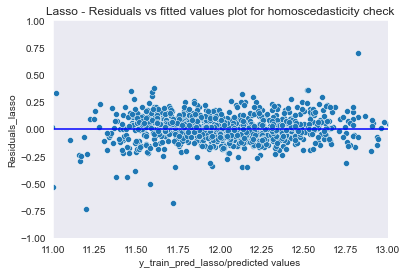

In [840]:
# Checking for homoscedasticity in the selected model
p = sns.scatterplot(y_train_pred_lasso,residuals_lasso)
plt.xlabel('y_train_pred_lasso/predicted values')
plt.ylabel('Residuals_lasso')
plt.ylim(-1,1)
plt.xlim(11,13)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Lasso - Residuals vs fitted values plot for homoscedasticity check')




### Relation between Actual & Predicted Model of Test Target
- Since the plot appears to be in a straight line or linear format and showing Direct proportionality it can be said that the model has a fairly accurate prediction

Text(0, 0.5, 'y_test_pred_lasso')

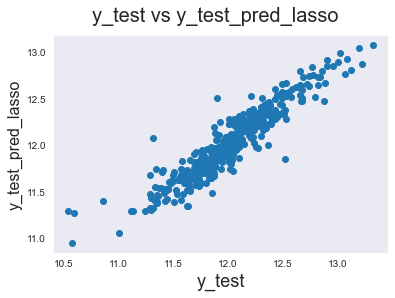

In [841]:
# Comparing the relation between Actual & Predicted Model of Test Target
fig = plt.figure()
plt.scatter(y_test2, y_test_pred_lasso)
fig.suptitle('y_test vs y_test_pred_lasso', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_lasso', fontsize = 16)   

In [842]:
# Min Max of the predicted train scores of the final model
print(y_train_pred_lasso.min())

print(y_train_pred_lasso.max())


10.997235443309405
13.401142153055533


In [843]:
# Min Max of the residuals of the final model
print(residuals_lasso.min())
print(residuals_lasso.max())

-1.4182130588395694
0.6968882661979485


### Multicollineniarity
- Most of the variables are in the Dark Blue region Depicting Lower colliniarity
- It can be said that Features in the final selected Lasso Model do not show Multicollineniarity.

<AxesSubplot:>

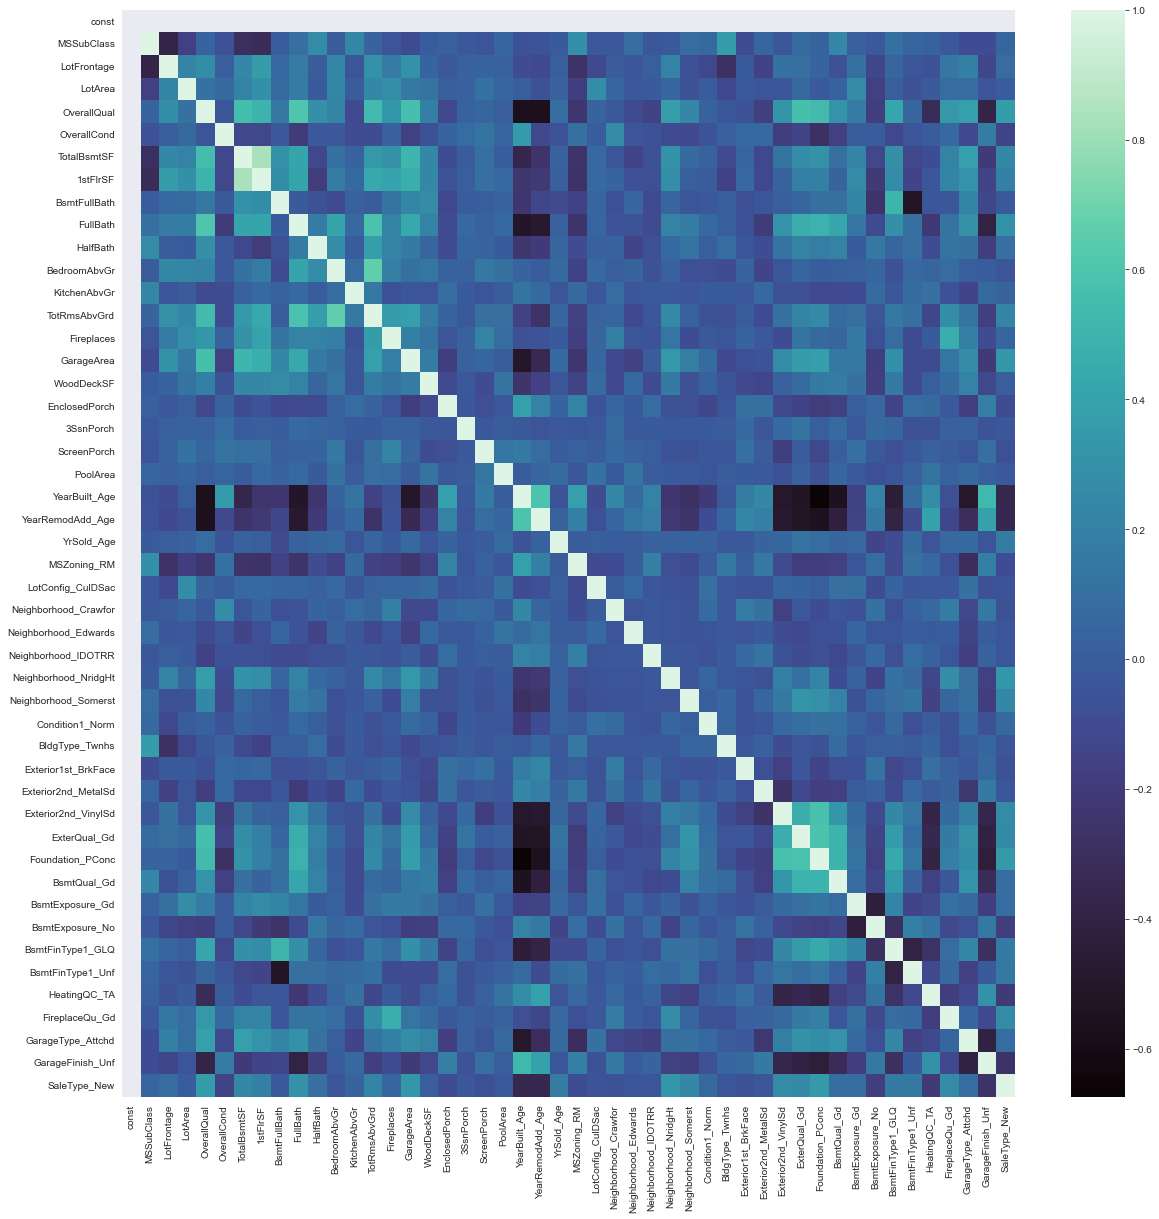

In [844]:
#Checking for multi colimiarity
plt.subplots(figsize=(20, 20))
mulcorr = X_test_sm_lasso.corr()
sns.heatmap(mulcorr, cmap="mako", annot=False)


### Autocorrelation
- Not much auto corelation is observed as all the values are present under the confidence interval region



<Figure size 1080x1440 with 0 Axes>

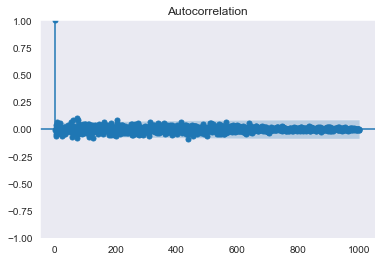

Text(0.5, 0.98, 'Autocorrelation')

In [845]:
# Autocorrelation plot
fig = plt.figure(figsize=(15,20))
sm.graphics.tsa.plot_acf(residuals_lasso, lags=1000)
plt.show()
fig.suptitle('Autocorrelation', fontsize = 20)              # Plot heading 

# Question 1

- What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [846]:
from sklearn.linear_model import Ridge
# Model building using double optimal alpha
double_alpha = 200
ridge_double = Ridge(alpha=double_alpha) 
ridge_double.fit(X_train, y_train)

Ridge(alpha=200)

In [847]:
# Ridge model parameters
model_parameters = list(ridge_double.coef_)
model_parameters.insert(0, ridge_double.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


ridge_double_coef = pd.DataFrame(model_parameters,cols)
ridge_double_coef.reset_index(inplace=True)
ridge_double_coef.columns = ["Feature","Value"]
ridge_double_coef.sort_values(by="Value",inplace=True,ascending=False)
ridge_double_coef.head(6)

Feature   Value
0      constant  11.922
4   OverallQual   0.076
14    GrLivArea   0.042
5   OverallCond   0.036
23   GarageCars   0.032
11     1stFlrSF   0.030

In [848]:
#lets predict the R-squared value 
y_train_pred = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# Prediction on test set
y_test_pred = ridge_double.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
# Printing the RMSE value
print(mean_squared_error(y_test, y_test_pred))

0.8865632672853049
0.8729105163784006
0.020911318444582605


In [849]:
# Creating Variables for different Predicted scores of the model
double_ridge_r2_train = (round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred),4) * 100)
double_ridge_r2_test = (round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred),4) * 100)
double_ridge_mse = mean_squared_error(y_test, y_test_pred)

In [850]:
from sklearn.linear_model import Lasso

# Model building using optimal alpha
double_alpha = 2 * 0.002
lasso_double = Lasso(alpha=double_alpha)
X_train_final = X_train2[selectedcols]
lasso_double.fit(X_train_final, y_train2)

Lasso(alpha=0.004)

In [851]:
# Lasso model parameters
model_parameters = list(lasso_double.coef_)
model_parameters.insert(0, lasso_double.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train_final.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


lasso_double_coef = pd.DataFrame(model_parameters,cols)
lasso_double_coef.reset_index(inplace=True)
lasso_double_coef.columns = ["Feature","Value"]
lasso_double_coef.sort_values(by="Value",inplace=True,ascending=False)
lasso_double_coef.head(6)

Feature   Value
0       constant  11.994
4    OverallQual   0.129
13  TotRmsAbvGrd   0.053
15    GarageArea   0.050
5    OverallCond   0.039
7       1stFlrSF   0.038

In [852]:
#Predict the R-squared value for Train data
y_train_pred = lasso_double.predict(X_train_final)
print(metrics.r2_score(y_true=y_train2, y_pred=y_train_pred))

#Predict the R-squared value for test data
X_test2 = X_test2[selectedcols]
y_test_pred = lasso.predict(X_test2)
print(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred))

mean_squared_error(y_test2, y_test_pred)

0.8677998414957213
0.8686423049470438


0.02161361045086424

In [853]:
# Creating Variables for different Predicted scores of the model
double_lasso_r2_train = (round(metrics.r2_score(y_true=y_train2, y_pred=y_train_pred),4) * 100)
double_lasso_r2_test = (round(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred),4) * 100)
double_lasso_mse = mean_squared_error(y_test2, y_test_pred)

In [854]:
# Observing the values of the different Predicted scores of the model
Double_Metrics = ["Alpha", "200", "0.004"], ["R2_Train", double_ridge_r2_train, double_lasso_r2_train], [ "R2_Test", double_ridge_r2_test, double_lasso_r2_test], [ "MSE", double_ridge_mse, double_lasso_mse]

x2_metrics_compare = pd.DataFrame(Double_Metrics)

x2_metrics_compare.columns = ["Metrics", "Ridge", "Lasso"]

x2_metrics_compare

Metrics     Ridge     Lasso
0     Alpha       200     0.004
1  R2_Train     88.66     86.78
2   R2_Test     87.29     86.86
3       MSE  0.020911  0.021614

# Question 3

- After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [855]:
from sklearn.linear_model import Ridge
# Model building using double optimal alpha
alpha = 100
ridge_min5 = Ridge(alpha=alpha)
X_train_min5 = X_train.drop(["GrLivArea", "OverallCond", "GarageCars", "Condition1_Norm", "OverallQual"], axis = 1)
ridge_min5.fit(X_train_min5, y_train)

Ridge(alpha=100)

In [856]:
# Ridge model parameters
model_parameters = list(ridge_min5.coef_)
model_parameters.insert(0, ridge_min5.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train_min5.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


ridge_double_coef = pd.DataFrame(model_parameters,cols)
ridge_double_coef.reset_index(inplace=True)
ridge_double_coef.columns = ["Feature","Value"]
ridge_double_coef.sort_values(by="Value",inplace=True,ascending=False)
ridge_double_coef.head(6)

Feature   Value
0               constant  11.894
10              2ndFlrSF   0.061
9               1stFlrSF   0.059
20            GarageArea   0.045
18          TotRmsAbvGrd   0.038
58  Neighborhood_Crawfor   0.037

In [857]:
#lets predict the R-squared value 
y_train_pred = ridge_min5.predict(X_train_min5)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
# Printing the RMSE value
print(mean_squared_error(y_test, y_test_pred))


0.8697713391522878
0.8789097191832093
0.01992420891600421


In [858]:
# Creating Variables for different Predicted scores of the model
min5_ridge_r2_train = (round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred),4) * 100)
min5_ridge_r2_test = (round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred),4) * 100)
min5_ridge_mse = mean_squared_error(y_test, y_test_pred)

In [859]:
from sklearn.linear_model import Lasso

# Model building using optimal alpha
alpha = 0.002
lasso_min5 = Lasso(alpha=alpha)
Xtrain_new = X_train2[selectedcols]
X_train2_min5 = Xtrain_new.drop(["OverallQual", "Neighborhood_Crawfor", "TotRmsAbvGrd", "GarageArea", "Condition1_Norm"], axis = 1)
lasso_min5.fit(X_train2_min5, y_train2)

Lasso(alpha=0.002)

In [860]:
# Lasso model parameters
model_parameters = list(lasso_min5.coef_)
model_parameters.insert(0, lasso_min5.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
model_parameters

cols = X_train2_min5.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))


lasso_double_coef = pd.DataFrame(model_parameters,cols)
lasso_double_coef.reset_index(inplace=True)
lasso_double_coef.columns = ["Feature","Value"]
lasso_double_coef.sort_values(by="Value",inplace=True,ascending=False)
lasso_double_coef.head(6)

Feature   Value
0               constant  11.955
25  Neighborhood_NridgHt   0.128
6               1stFlrSF   0.085
8               FullBath   0.075
9               HalfBath   0.070
32      Foundation_PConc   0.068

In [861]:
#Predict the R-squared value for Train data
y_train_pred = lasso_min5.predict(X_train2_min5)
print(metrics.r2_score(y_true=y_train2, y_pred=y_train_pred))

#Predict the R-squared value for test data
X_test2 = X_test2[selectedcols]
y_test_pred = lasso.predict(X_test2)
print(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred))

mean_squared_error(y_test2, y_test_pred)

0.8368211211897683
0.8686423049470438


0.02161361045086424

In [862]:
# Creating Variables for different Predicted scores of the model
min5_lasso_r2_train = (round(metrics.r2_score(y_true=y_train2, y_pred=y_pred_sm),4) * 100)
min5_lasso_r2_test = (round(metrics.r2_score(y_true=y_test2, y_pred=y_test_pred),4) * 100)
min5_lasso_mse = mean_squared_error(y_test2, y_test_pred)

In [863]:
# Observing the values of the different Predicted scores of the model
min5_Metrics = ["Alpha", "200", "0.004"], ["R2_Train", min5_ridge_r2_train, min5_lasso_r2_train], [ "R2_Test", min5_ridge_r2_test, min5_lasso_r2_test], [ "MSE", min5_ridge_mse, min5_lasso_mse]

min5_metrics_compare = pd.DataFrame(min5_Metrics)

min5_metrics_compare.columns = ["Metrics", "Ridge", "Lasso"]

min5_metrics_compare

Metrics     Ridge     Lasso
0     Alpha       200     0.004
1  R2_Train     86.98     88.86
2   R2_Test     87.89     86.86
3       MSE  0.019924  0.021614